# 0 - Quick Imports

In [3]:
# set path to the parent dir
import os
import sys
sys.path.append('src')
os.chdir(os.path.join(os.path.expanduser('~'),'project/r2e/r2e-edits-internal'))
# os.chdir(os.path.join(os.path.expanduser('~'),'r2e-edits-internal'))

!pwd

/home/gcpuser/project/r2e/r2e-edits-internal


In [4]:
import numpy as np
from collections import deque
import pandas as pd
import os,sys

import sys 
# sys.path.append(".")
# sys.path.append("..")

import random
# from torchvision import transforms, utils
from PIL import Image, ImageFilter 

import PIL
from PIL import Image
import numpy as np

# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# seaborn
import seaborn as sns
sns.set()

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [5]:
def display_alongside_batch(img_list, resize_dims=(512,512)):
    if isinstance(resize_dims, int):
        resize_dims = (resize_dims,resize_dims)
    res = np.concatenate([np.array(img.resize(resize_dims)) for img in img_list], axis=1)
    return Image.fromarray(res)

In [6]:
from IPython.core.magic import register_cell_magic
from IPython.display import Markdown

@register_cell_magic
def info(line, cell):
    display(Markdown(f'<div class="alert alert-info"><strong>Info!</strong> {cell}</div>'))

@register_cell_magic
def warning(line, cell):
    display(Markdown(f'<div class="alert alert-warning"><strong>Warning!</strong> {cell}</div>'))

@register_cell_magic
def error(line, cell):
    display(Markdown(f'<div class="alert alert-danger"><strong>Error!</strong> {cell}</div>'))

from IPython.display import Markdown

def create_alert_block(alert_type, content):
    html = f'<div class="alert alert-{alert_type}"><strong>{alert_type.capitalize()}!</strong> {content}</div>'
    display(Markdown(html))

In [7]:
from src.r2e_edits.agenthub.utils.log import get_logger
logger = get_logger(name='jupyter')
logger.info('hello')

[03/28/25 09:57:33] INFO     hello

# 1.0 - Paper Figures

## 1.1 Overview figure

## 1.1.1 - Dataset Size

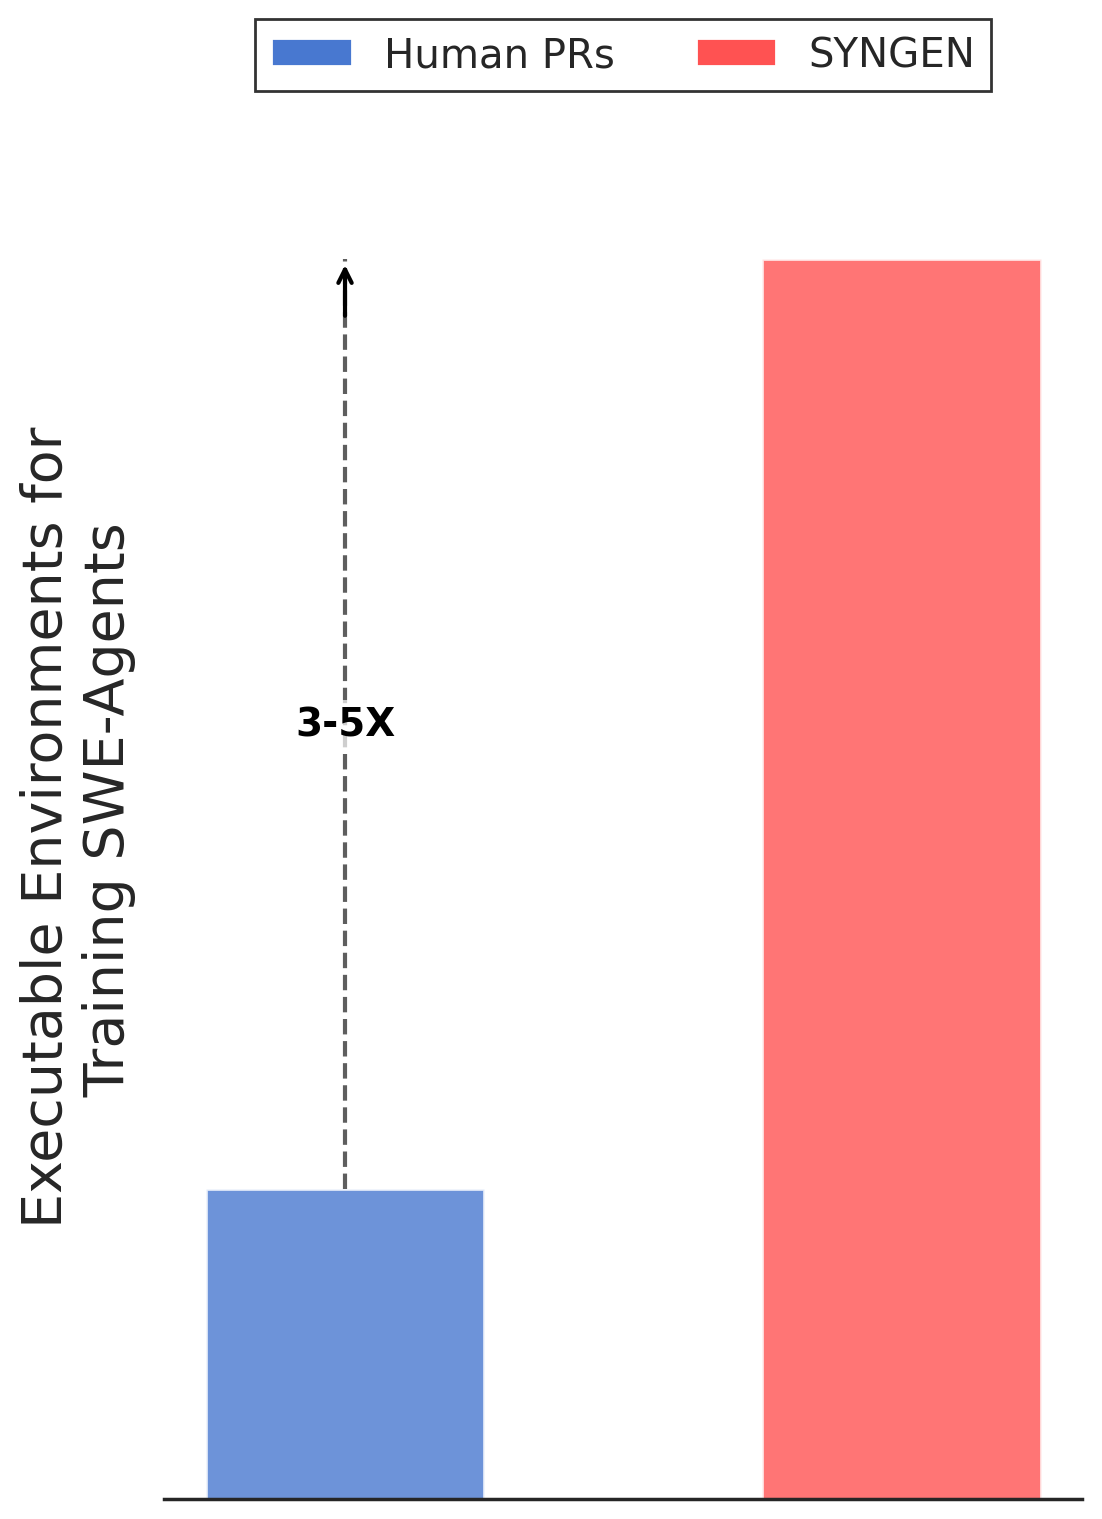

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style to a clean, professional look
sns.set_style("white")
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})

# Data for display - just two bars now
methods = ['Human PRs', 'SYNGEN']

# Option 1: If you want to show actual percentage values
real_performance = [10, 40]  # Example values - replace with your actual data
# Use exaggerated differences for plotting to make bars stand out visually
plot_performance = [20, 80]  # Fake values for visual impact (larger gap)

# Option 2: If you don't want to show specific numbers (comment out option 1 and uncomment this)
real_performance = ["", ""]  # Empty strings for no numbers
plot_performance = [20, 80]  # Just for the visual difference

colors = ['#4878D0', '#FF5252']  # Blue for Human PRs, Red for SYNGEN

# Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 8))

# Make bars thinner
bar_width = 0.3

# Position bars closer together
positions = np.array([0, 0.6])

# Create bars using the plot values (visual only)
bars = ax.bar(
    positions, 
    plot_performance, 
    width=bar_width, 
    color=colors, 
    linewidth=1.0,
    alpha=0.8
)

# Add value labels inside bars (if option 1)
# Comment out this block if using option 2 (no numbers)
for i, bar in enumerate(bars):
    if real_performance[i]:  # Only add text if there's a value
        ax.text(
            bar.get_x() + bar.get_width()/2.,
            bar.get_height()/2,
            f'{real_performance[i]}%',  # Show REAL values
            ha='center',
            va='center',
            color='white',
            fontweight='bold',
            fontsize=16
        )

# Add improvement arrow and "3-5X" text
# Draw a thin line from the top of first bar to the level of the second bar
ax.plot(
    [positions[0], positions[0]],
    [plot_performance[0], plot_performance[1]],
    'k--',
    linewidth=1.5,
    alpha=0.7,
)

# Add the "3-5X" text
midpoint = (plot_performance[0] + plot_performance[1]) / 2
ax.text(
    positions[0],
    midpoint,
    '3-5X',  # Now showing "3-5X" instead of the difference
    ha='center',
    va='center',
    color='black',
    fontweight='bold',
    fontsize=14,
    backgroundcolor='white',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=2)
)

# Add an arrowhead at the top
ax.annotate(
    '',
    xy=(positions[0], plot_performance[1]),
    xytext=(positions[0], plot_performance[1] - 4),
    arrowprops=dict(
        arrowstyle='->',
        color='black',
        linewidth=1.5
    )
)

# Keep axes but remove ticks
ax.set_xticks([])
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add y-axis label - modify as needed
ax.set_ylabel('Executable Environments for \n Training SWE-Agents', fontsize=20, labelpad=10)

# Set y-axis limits
ax.set_ylim(0, plot_performance[1] * 1.1)

# Add a legend at the top with more space
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, facecolor=colors[0], label=methods[0]),
    plt.Rectangle((0, 0), 1, 1, facecolor=colors[1], label=methods[1])
]
ax.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.1),
    ncol=2,
    frameon=True,
    fancybox=False,
    edgecolor='black',
    fontsize=14.5,
)

# Adjust layout
plt.tight_layout(pad=2.0)

# Save the plot
plt.savefig('human-vs-syngen.png', dpi=300, bbox_inches='tight')
plt.show()

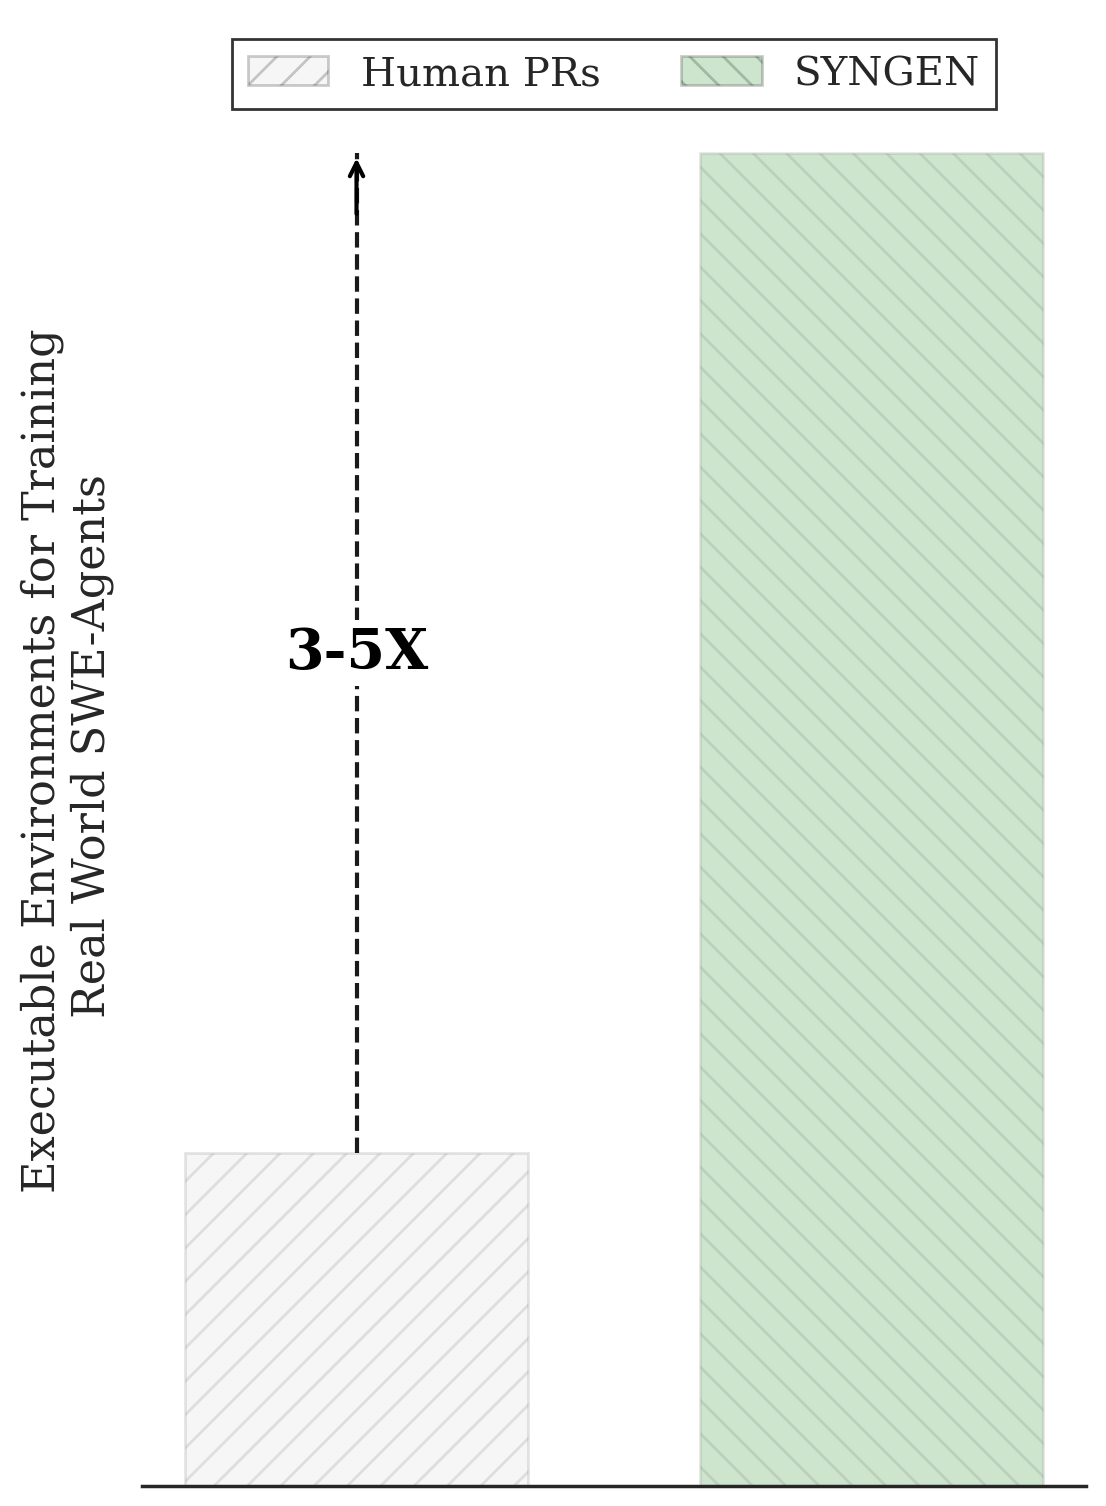

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle

# Set the style to a clean, professional look
sns.set_style("white")
plt.rcParams.update({
    'font.family': 'serif',  # More professional font for academic papers
    'font.size': 12,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})

# Data for display - just two bars now
methods = ['Human PRs', 'SYNGEN']
alpha = 0.2 #[0.4, 0.4]

# Option 1: If you want to show actual percentage values
# real_performance = [10, 40]  # Example values - replace with your actual data
# Use exaggerated differences for plotting to make bars stand out visually
# plot_performance = [20, 80]  # Fake values for visual impact (larger gap)

# Option 2: No specific numbers
real_performance = ["", ""]  # Empty strings for no numbers
plot_performance = [20, 80]  # Just for the visual difference

# Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 8))

# Make bars thinner
bar_width = 0.4

# Position bars closer together
positions = np.array([0, 0.6])
colors = ['#4878D0', '#6ACC65', '#FF5252']  # Vibrant color for Hybrid Scaling
colors = ['lightgray', 'green', '#FF5252']  # Vibrant color for Hybrid Scaling

# Black and white with hatching instead of colors
# Create bars using the plot values (visual only)
bars = ax.bar(
    positions, 
    plot_performance, 
    width=bar_width, 
    color=colors,  # White fill
    edgecolor='gray',  # Black outline 
    linewidth=1.0,
    alpha = alpha,
)

# Add different hatching patterns to distinguish bars
hatches = ['/', '\\']  # Simple diagonal hatches in opposite directions
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
    # Make the hatching more dense
    bar.set_hatch(hatch + hatch)

# Add value labels inside bars (if using option 1)
# for i, bar in enumerate(bars):
#     if real_performance[i]:  # Only add text if there's a value
#         ax.text(
#             bar.get_x() + bar.get_width()/2.,
#             bar.get_height()/2,
#             f'{real_performance[i]}%',  # Show REAL values
#             ha='center',
#             va='center',
#             color='black',  # Black text for better contrast
#             fontweight='bold',
#             fontsize=16
#         )

# Add improvement arrow and "3-5X" text
# Draw a thin line from the top of first bar to the level of the second bar
ax.plot(
    [positions[0], positions[0]],
    [plot_performance[0], plot_performance[1]],
    'k--',
    linewidth=1.5,
)

# Add the "3-5X" text
midpoint = (plot_performance[0] + plot_performance[1]) / 2
ax.text(
    positions[0],
    midpoint,
    '3-5X',  # Now showing "3-5X" instead of the difference
    ha='center',
    va='center',
    color='black',
    fontweight='bold',
    fontsize=20,
    backgroundcolor='white',
    bbox=dict(facecolor='white', edgecolor='none', pad=2)
)

# Add an arrowhead at the top
ax.annotate(
    '',
    xy=(positions[0], plot_performance[1]),
    xytext=(positions[0], plot_performance[1] - 4),
    arrowprops=dict(
        arrowstyle='->',
        color='black',
        linewidth=1.5
    )
)

# Keep axes but remove ticks
ax.set_xticks([])
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add y-axis label - modify as needed
ax.set_ylabel('Executable Environments for Training \n Real World SWE-Agents', fontsize=16, labelpad=10)

# Set y-axis limits
ax.set_ylim(0, plot_performance[1] * 1.1)

# Add a legend at the top with more space
legend_elements = [
    Rectangle((0, 0), 1, 1, facecolor=colors[0], edgecolor='black', hatch='//', label=methods[0], alpha=alpha),
    Rectangle((0, 0), 1, 1, facecolor=colors[1], edgecolor='black', hatch='\\\\', label=methods[1],alpha=alpha)
]
ax.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.),
    ncol=2,
    frameon=True,
    fancybox=False,
    edgecolor='black',
    fontsize=14.5,
)

# Adjust layout
plt.tight_layout(pad=2.0)

# Save the plot
plt.savefig('human-vs-syngen-bw.png', dpi=300, bbox_inches='tight')
plt.show()

## 1.1.2 - Hybrid Scaling

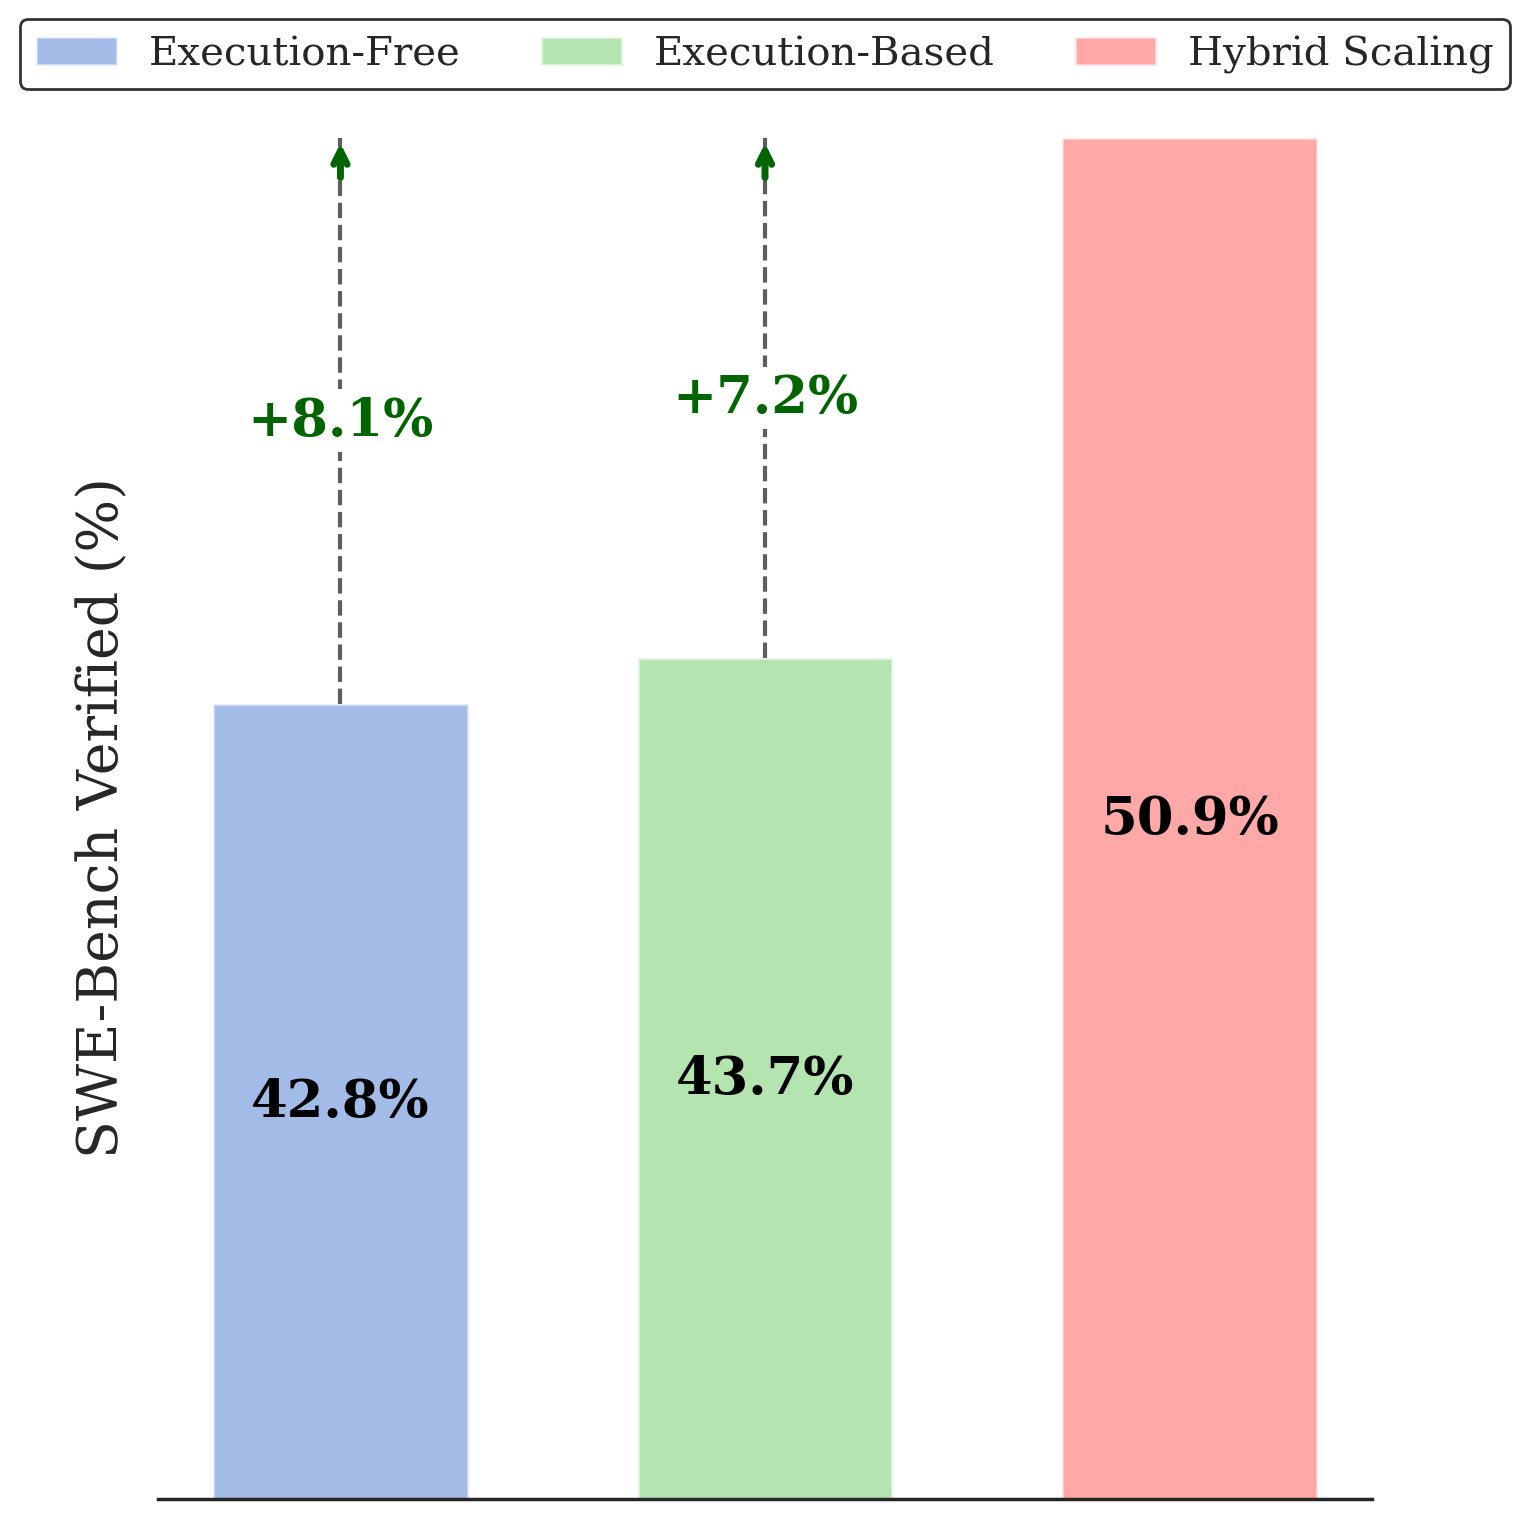

In [125]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle


# # Set the style to a clean, professional look
# sns.set_style("white")
# plt.rcParams.update({
#     # No sans-serif fonts as requested
#     'font.size': 12,
#     'axes.labelsize': 14,
#     'xtick.labelsize': 12,
#     'ytick.labelsize': 12,
#     'legend.fontsize': 12
# })

# Set the style to a clean, professional look
sns.set_style("white")
plt.rcParams.update({
    'font.family': 'serif',  # More professional font for academic papers
    'font.size': 12,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})


# Data for display
methods = ['Execution-Free', 'Execution-Based', 'Hybrid Scaling']
real_performance = [42.8, 43.7, 50.9]  # Actual values to display

# Use exaggerated differences for plotting to make bars stand out visually
# while keeping the displayed values accurate
plot_performance = [35, 37, 59.9]  # Fake values for visual impact

colors = ['#4878D0', '#6ACC65', '#FF5252']  # Vibrant color for Hybrid Scaling

# Create the figure and axes - make it taller than wide
fig, ax = plt.subplots(figsize=(8, 8))

# Make bars MUCH thinner
bar_width = 0.3

# Position bars MUCH closer together
positions = np.array([0, 0.5, 1.])

# Create bars using the plot values (visual only)
bars = ax.bar(
    positions, 
    plot_performance, 
    width=bar_width, 
    color=colors, 
    # edgecolor='black', 
    linewidth=1.0,
    alpha=0.5
)

# # Add different hatching patterns to distinguish bars
# hatches = ['/', '\\','*']  # Simple diagonal hatches in opposite directions
# for bar, hatch in zip(bars, hatches):
#     bar.set_hatch(hatch)
#     # Make the hatching more dense
#     bar.set_hatch(hatch + hatch)


# Add REAL value labels inside bars
for i, bar in enumerate(bars):
    ax.text(
        bar.get_x() + bar.get_width()/2.,
        bar.get_height()/2,
        f'{real_performance[i]}%',  # Show REAL values
        ha='center',
        va='center',
        color='black',
        fontweight='bold',
        fontsize=19
    )

# Add improvement arrows for the first two methods
max_val = real_performance[2]  # Use real value for max
for i in range(2):
    # Draw a thin line from the top of the bar to the level of the max value
    ax.plot(
        [positions[i], positions[i]],
        [plot_performance[i], plot_performance[2]],  # Use plot values for arrows
        'k--',
        linewidth=1.5,
        alpha=0.7,
    )
    
    # Add the delta value text (using REAL values for text)
    delta = real_performance[2] - real_performance[i]  # Calculate from REAL values
    midpoint = (plot_performance[i] + plot_performance[2]) / 2  # But position based on plot values
    
    ax.text(
        positions[i],
        midpoint,
        f'+{delta:.1f}%',  # Show REAL difference
        ha='center',
        va='center',
        color='darkgreen',
        fontweight='bold',
        fontsize=19,
        backgroundcolor='white',
        bbox=dict(facecolor='white', alpha=1., edgecolor='none', pad=2)
    )
    
    # Add an arrowhead at the top
    ax.annotate(
        '',
        xy=(positions[i], plot_performance[2]),
        xytext=(positions[i], plot_performance[2] - 2),
        arrowprops=dict(
            arrowstyle='->',
            color='darkgreen',
            linewidth=2.5
        )
    )

# Keep axes but remove ticks
ax.set_xticks([])
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add y-axis label
ax.set_ylabel('SWE-Bench Verified (%)', fontsize=20, labelpad=10)
# ax.set_ylabel('SWE-Bench Verified (%)', fontsize=20, labelpad=0, fontweight='bold')


# Set y-axis limits to make the differences stand out even more
ax.set_ylim(0, 60)#plot_performance[2] * 1.2)

# Add a legend at the top with more space
# legend_elements = [
#     plt.Rectangle((0, 0), 1, 1, facecolor=colors[0], edgecolor='black', label=methods[0]),
#     plt.Rectangle((0, 0), 1, 1, facecolor=colors[1], edgecolor='black', label=methods[1]),
#     plt.Rectangle((0, 0), 1, 1, facecolor=colors[2], edgecolor='black', label=methods[2])
# ]
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, facecolor=colors[0],  label=methods[0], alpha=0.5),
    plt.Rectangle((0, 0), 1, 1, facecolor=colors[1], label=methods[1], alpha=0.5),
    plt.Rectangle((0, 0), 1, 1, facecolor=colors[2],  label=methods[2], alpha=0.5)
]
ax.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.1),
    ncol=3,
    frameon=True,
    fancybox=True,
    edgecolor='black',
    fontsize=14.5,
    # alpha=0.5,
)

# Adjust layout
plt.tight_layout(pad=2.0)

# Save the plot
plt.savefig('notebooks/overview-p2-v1.png', dpi=300, bbox_inches='tight')
plt.show()

### 1.1.3 Comparison with baselines

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle


# # Set the style to a clean, professional look
# sns.set_style("white")
# plt.rcParams.update({
#     # No sans-serif fonts as requested
#     'font.size': 12,
#     'axes.labelsize': 14,
#     'xtick.labelsize': 12,
#     'ytick.labelsize': 12,
#     'legend.fontsize': 12
# })

# Set the style to a clean, professional look
sns.set_style("white")
plt.rcParams.update({
    'font.family': 'serif',  # More professional font for academic papers
    'font.size': 12,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})

In [145]:
list(methods)

['SweFixer',
 'SweGym',
 'SweRL',
 'Ours',
 'O1',
 'Sonnet + Agentless',
 'Sonnet + OpenHands']

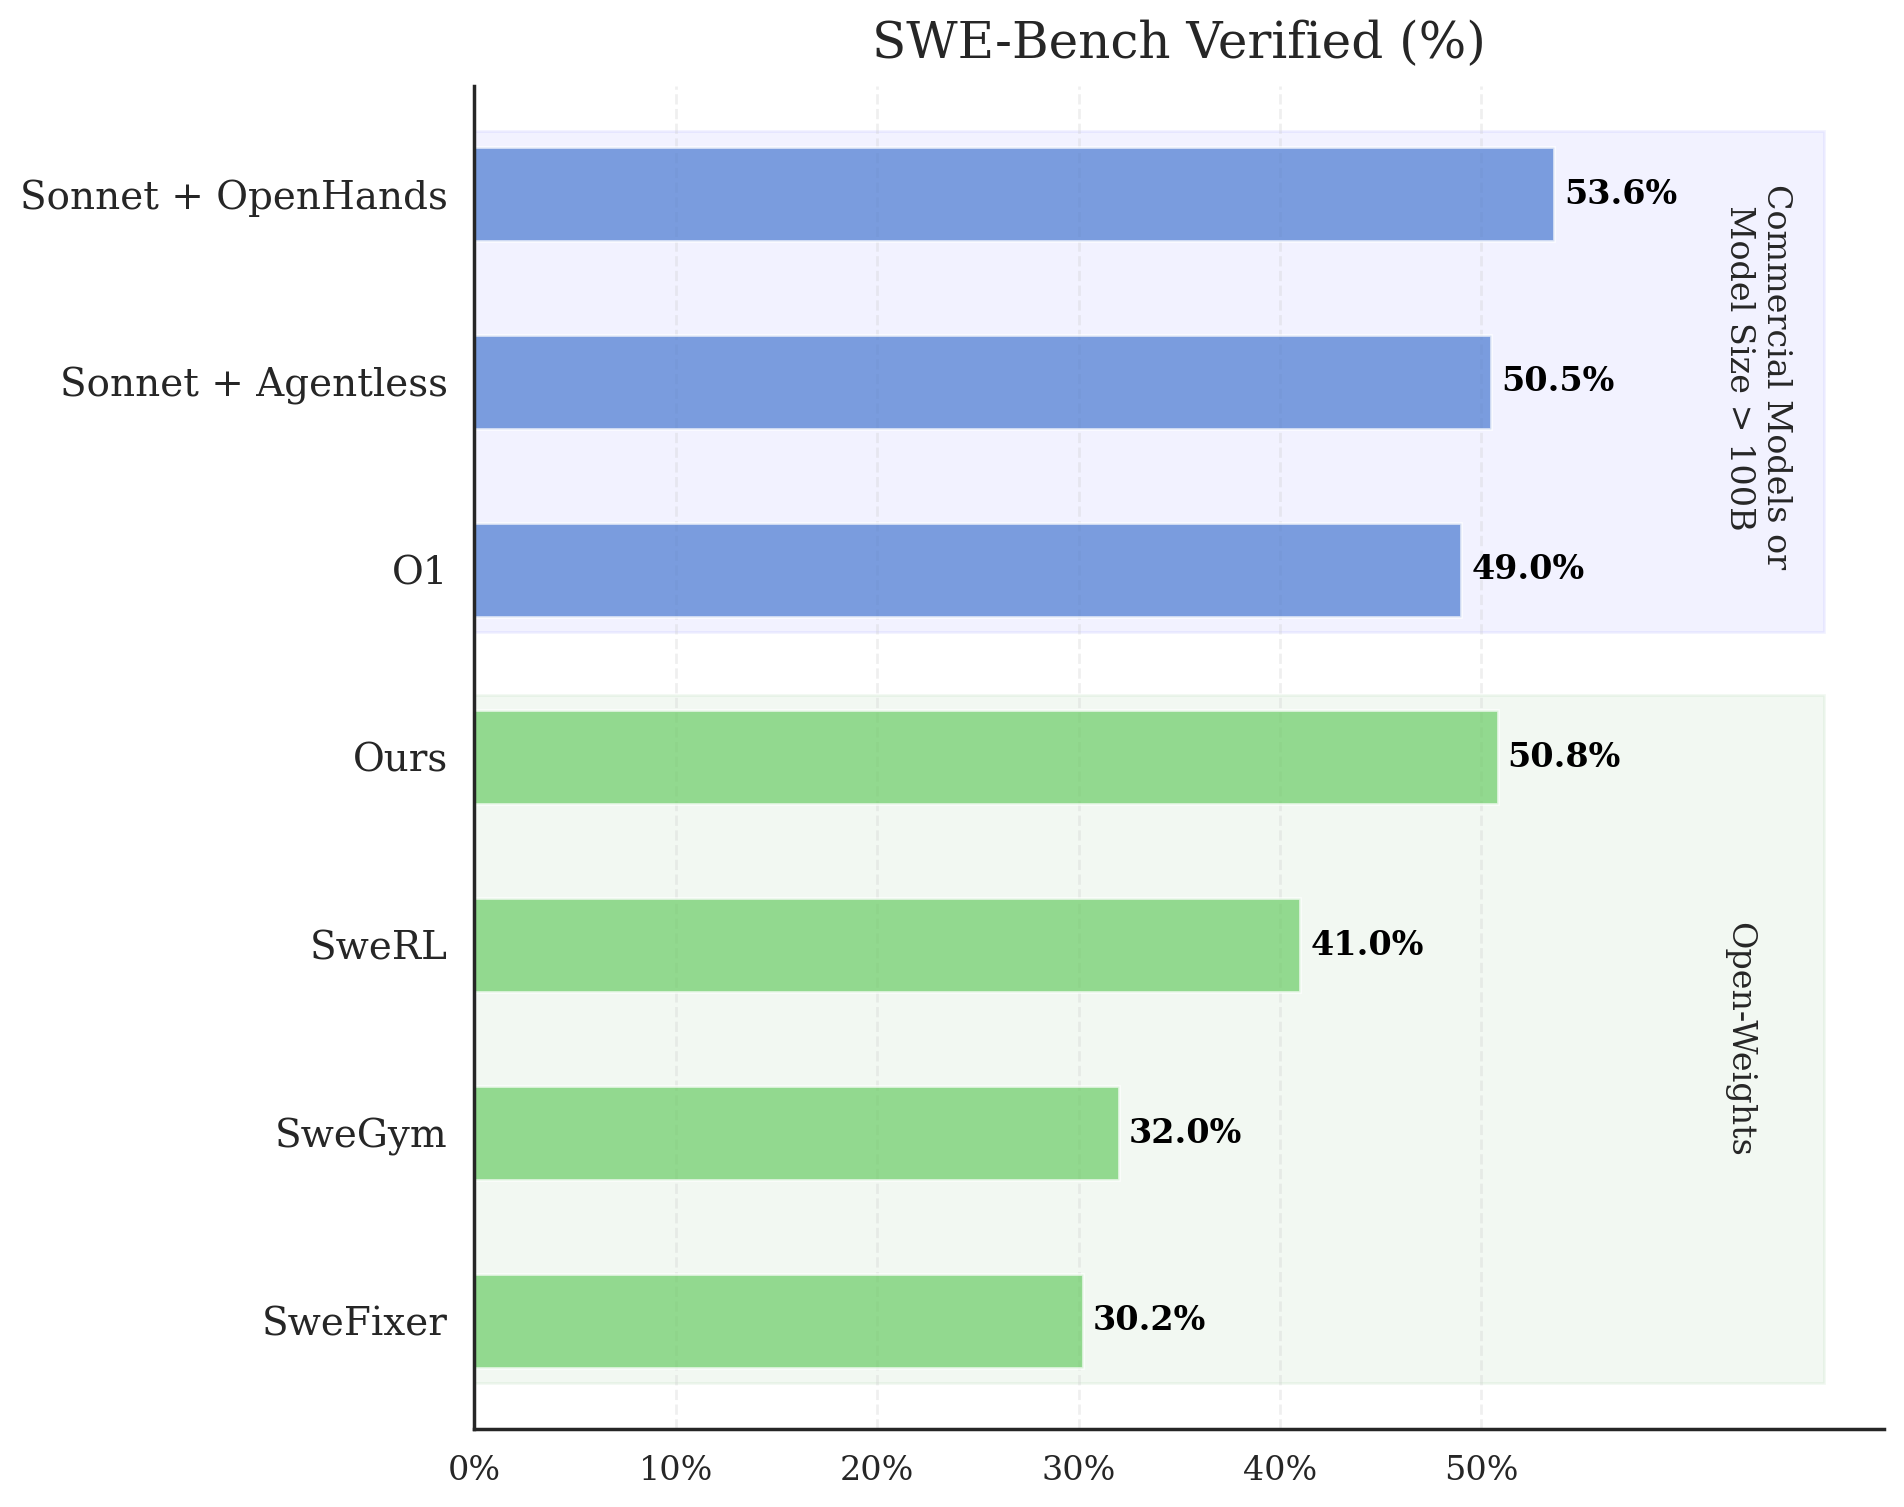

In [164]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle
from collections import OrderedDict

# Set the style to a clean, professional look
sns.set_style("white")
plt.rcParams.update({
    'font.family': 'serif',  # More professional font for academic papers
    'font.size': 12,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})

# Data for display (ordered from lowest to highest)

methods_ = OrderedDict({
    'SweFixer': True, 
    'SweGym': True, 
    'SweRL': True, 
    'Ours': True, 
    'O1': False, 
    'Sonnet + Agentless': False, 
    'Sonnet + OpenHands': False,
})
methods = list(methods_.keys())
# Actual performance values to display
real_performance = [30.2, 32.0, 41.0, 50.8, 49.0, 50.5, 53.6]

# Define colors - highlight "Ours" with a different color
colors = ['#4878D0', '#4878D0', '#4878D0', '#4878D0', '#FF5252', '#6ACC65', '#6ACC65']
colors = ['#6ACC65','#6ACC65','#6ACC65','#6ACC65', '#4878D0']

color_closedsource = '#4878D0'
color_opensource = '#6ACC65'
colors = [color_opensource if methods_[x] else color_closedsource for x in methods]


# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Bar height
bar_height = 0.5

# Position bars
positions = np.arange(len(methods))

# Create horizontal bars using the real values
bars = ax.barh(
    positions, 
    real_performance, 
    height=bar_height, 
    color=colors, 
    linewidth=1.0,
    alpha=0.7
)

# Add value labels at the end of each bar
for i, bar in enumerate(bars):
    ax.text(
        bar.get_width() + 0.5,
        bar.get_y() + bar.get_height()/2,
        f'{real_performance[i]}%',
        ha='left',
        va='center',
        color='black',
        fontweight='bold',
        fontsize=12
    )

# Highlight improvements against baselines
# Add improvement arrows for our method compared to SweRL
swe_rl_idx = methods.index('SweRL')
our_idx = methods.index('Ours')
delta = real_performance[our_idx] - real_performance[swe_rl_idx]

# # Draw a dashed line from SweRL to Ours level
# ax.plot(
#     [real_performance[swe_rl_idx], real_performance[our_idx]],
#     [positions[swe_rl_idx], positions[swe_rl_idx]],
#     'k--',
#     linewidth=1.5,
#     alpha=0.7,
# )

# # Add the delta value
# midpoint = (real_performance[swe_rl_idx] + real_performance[our_idx]) / 2
# ax.text(
#     midpoint,
#     positions[swe_rl_idx] - 0.2,
#     f'+{delta:.1f}%',
#     ha='center',
#     va='center',
#     color='darkgreen',
#     fontweight='bold',
#     fontsize=12,
#     backgroundcolor='white',
#     bbox=dict(facecolor='white', alpha=1.0, edgecolor='none', pad=2)
# )

# # Add an arrowhead
# ax.annotate(
#     '',
#     xy=(real_performance[our_idx], positions[swe_rl_idx]),
#     xytext=(real_performance[our_idx] - 2, positions[swe_rl_idx]),
#     arrowprops=dict(
#         arrowstyle='->',
#         color='darkgreen',
#         linewidth=2.0
#     )
# )

# # Also show the improvement from OpenHands vs Ours
# open_hands_idx = methods.index('Sonnet + OpenHands')
# delta2 = real_performance[open_hands_idx] - real_performance[our_idx]

# # Draw a dashed line from Ours to OpenHands level
# ax.plot(
#     [real_performance[our_idx], real_performance[open_hands_idx]],
#     [positions[our_idx], positions[our_idx]],
#     'k--',
#     linewidth=1.5,
#     alpha=0.7,
# )

# # Add the delta value
# midpoint2 = (real_performance[our_idx] + real_performance[open_hands_idx]) / 2
# ax.text(
#     midpoint2,
#     positions[our_idx] - 0.2,
#     f'+{delta2:.1f}%',
#     ha='center',
#     va='center',
#     color='darkgreen',
#     fontweight='bold',
#     fontsize=12,
#     backgroundcolor='white',
#     bbox=dict(facecolor='white', alpha=1.0, edgecolor='none', pad=2)
# )

# # Add an arrowhead
# ax.annotate(
#     '',
#     xy=(real_performance[open_hands_idx], positions[our_idx]),
#     xytext=(real_performance[open_hands_idx] - 2, positions[our_idx]),
#     arrowprops=dict(
#         arrowstyle='->',
#         color='darkgreen',
#         linewidth=2.0
#     )
# )

# Set custom y-tick labels
ax.set_yticks(positions)
ax.set_yticklabels(methods, fontsize=14)

# Keep x-axis ticks but make them minimal
ax.set_xticks(np.arange(0, 60, 10))
ax.set_xticklabels([f'{x}%' for x in range(0, 60, 10)])

# Set axis labels
# ax.set_xlabel('SWE-Bench Verified (%)', fontsize=16, labelpad=10)

# Adjust spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Set x-axis limits to provide some padding
ax.set_xlim(0, 70)

# Add a light grid for readability
ax.grid(axis='x', linestyle='--', alpha=0.3)

# Group methods with colored backgrounds for easier comparison
# This is optional but can help visually group categories
def add_background(start_idx, end_idx, color, label):
    y_start = positions[start_idx] - bar_height/1.5
    y_end = positions[end_idx] + bar_height/1.5
    height = y_end - y_start
    rect = Rectangle((0, y_start), 67, height, color=color, alpha=0.05, zorder=0)
    ax.add_patch(rect)
    ax.text(62, (y_start + y_end)/2, label, rotation=270, va='center', alpha=1., fontsize=12)

# Add backgrounds for different method groups
add_background(0, 3, 'green', 'Open-Weights')
add_background(4, 6, 'blue', 'Commercial Models or \n  Model Size > 100B')
# add_background(0, 2, 'blue', 'Baselines')
# add_background(3, 3, 'purple', 'Commercial')
# add_background(4, 4, 'red', 'Ours')
# add_background(5, 6, 'green', 'Variants')

# Add a title
# plt.title('Performance Comparison Across Methods', fontsize=18, pad=20)\
plt.title('SWE-Bench Verified (%)', fontsize=18, pad=10)

# Adjust layout
plt.tight_layout(pad=2.0)

# Save the plot
plt.savefig('horizontal_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 1.2 Env Stats Figure

In [6]:
from pathlib import Path
from datasets import load_dataset

In [15]:
# read the ds
r2e_ds = load_dataset("r2e-edits/r2e-dockers-v1")
r2e_ds

Generating train split:   0%|          | 0/4578 [00:00<?, ? examples/s]

Generating dev_10pr_v1 split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating dev_100pr_v1 split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating dev_200pr_v1 split:   0%|          | 0/1876 [00:00<?, ? examples/s]

Generating dev_100pr_v2 split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating dev_100pr_v3 split:   0%|          | 0/876 [00:00<?, ? examples/s]

Generating dev_100pr_v4 split:   0%|          | 0/575 [00:00<?, ? examples/s]

Generating dev_100pr_v5 split:   0%|          | 0/782 [00:00<?, ? examples/s]

Generating dev_100pr_v6 split:   0%|          | 0/701 [00:00<?, ? examples/s]

Generating dev_100pr_v7 split:   0%|          | 0/300 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['repo_name', 'docker_image', 'commit_hash', 'parsed_commit_content', 'execution_result_content', 'modified_files', 'modified_entity_summaries', 'relevant_files', 'num_non_test_files', 'num_non_test_func_methods', 'num_non_test_lines', 'prompt', 'problem_statement', 'expected_output_json'],
        num_rows: 4578
    })
    dev_10pr_v1: Dataset({
        features: ['repo_name', 'docker_image', 'commit_hash', 'parsed_commit_content', 'execution_result_content', 'modified_files', 'modified_entity_summaries', 'relevant_files', 'num_non_test_files', 'num_non_test_func_methods', 'num_non_test_lines', 'prompt', 'problem_statement', 'expected_output_json'],
        num_rows: 100
    })
    dev_100pr_v1: Dataset({
        features: ['repo_name', 'docker_image', 'commit_hash', 'parsed_commit_content', 'execution_result_content', 'modified_files', 'modified_entity_summaries', 'relevant_files', 'num_non_test_files', 'num_non_test_func_methods',

In [16]:
swe_ds = load_dataset("r2e-edits/swebench-verified-v1")
swe_ds

DatasetDict({
    test: Dataset({
        features: ['repo', 'instance_id', 'base_commit', 'patch', 'test_patch', 'problem_statement', 'hints_text', 'created_at', 'version', 'FAIL_TO_PASS', 'PASS_TO_PASS', 'environment_setup_commit', 'parsed_commit', 'run_tests', 'docker_image'],
        num_rows: 500
    })
})

In [17]:
# select the dataset
# ds = swe_ds['test']
ds = r2e_ds['train']

In [18]:
ds

Dataset({
    features: ['repo_name', 'docker_image', 'commit_hash', 'parsed_commit_content', 'execution_result_content', 'modified_files', 'modified_entity_summaries', 'relevant_files', 'num_non_test_files', 'num_non_test_func_methods', 'num_non_test_lines', 'prompt', 'problem_statement', 'expected_output_json'],
    num_rows: 4578
})

In [20]:
ds['repo_name']

['aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'aiohttp',
 'ai

Available styles: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


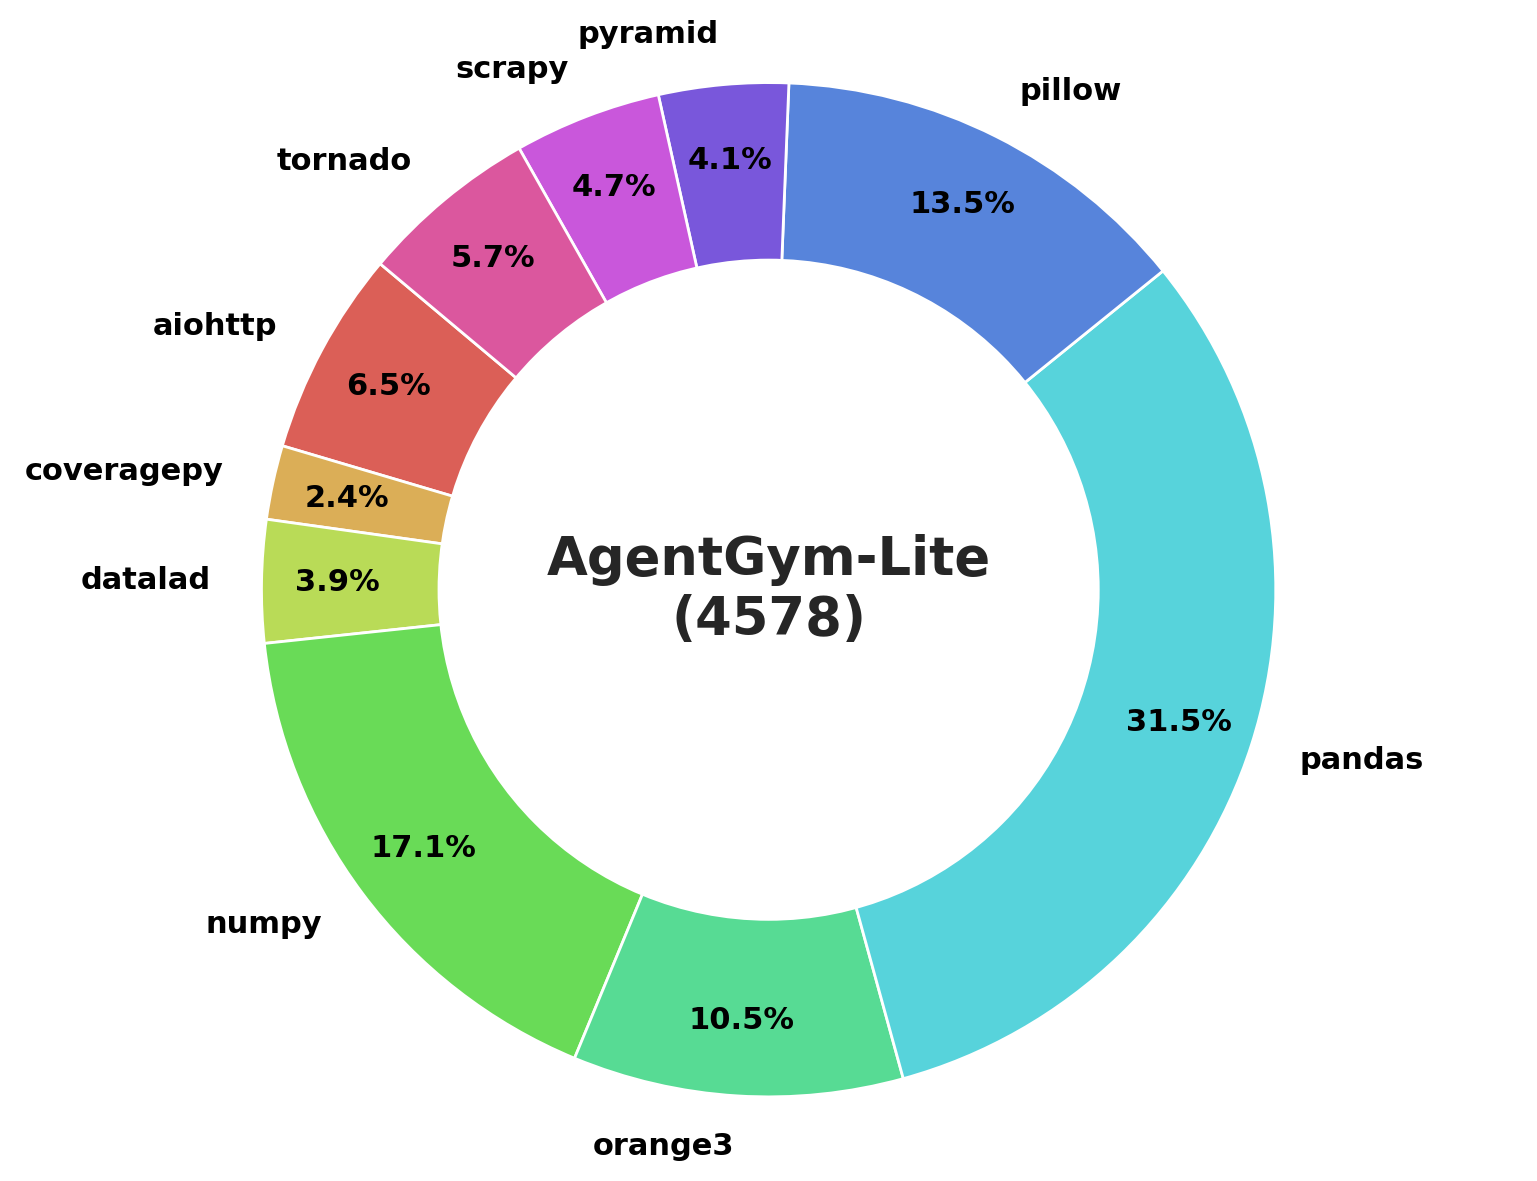

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# # Sample data (label -> value)
# data = {
#     "SWE-Gym": 2438,
#     "pandas": 737,
#     "bokeh": 26,
#     "hydra": 66,
#     "conan": 75,
#     "pydantic": 83,
#     "modin": 107,
#     "dask": 145,
#     "dvc": 225,
#     "mypy": 257,
#     "moto": 343,
#     "MONAI": 374
# }

data = data = Counter(ds['repo_name'])

# --- Convert dictionary to lists ---
labels = list(data.keys())
sizes  = list(data.values())

# --- Optional: sort by size if you want descending order (comment out if unwanted) ---
# sizes, labels = zip(*sorted(zip(sizes, labels), reverse=True))

# --- Seaborn styling ---
sns.set_theme(style="whitegrid")  # or "darkgrid", etc.

# List all available matplotlib styles
all_styles = plt.style.available
print("Available styles:", all_styles)

# Use a nice qualitative palette; adjust n_colors as needed
colors = sns.color_palette("hls", n_colors=len(data))

# --- Create the figure ---
fig, ax = plt.subplots(figsize=(8, 6))

# --- Draw a pie chart (we’ll turn it into a donut) ---
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",      # format inside-slice labels
    startangle=140,         # rotate start
    colors=colors,
    pctdistance=0.85,       # label position (closer to center for donut)
    textprops=dict(color="black", weight="bold")
)

# --- Draw a white circle in the middle to make it a donut ---
center_circle = plt.Circle((0, 0), 0.65, color="white")
ax.add_artist(center_circle)

# --- Style adjustments ---
# Make sure pie is drawn as a circle (equal aspect ratio)
ax.axis("equal")  

# Optionally, change the size of inside labels
for autotext in autotexts:
    autotext.set_size(11)  # You can adjust this

# --- Title or annotation in the center (optional) ---
# We can annotate the center with total count, for example:
total = sum(sizes)
ax.text(
    0, 0, f"AgentGym-Lite\n({total})", 
    horizontalalignment="center", 
    verticalalignment="center", 
    fontsize=19, weight="bold"
)

# --- Final layout and show ---
plt.tight_layout()
plt.show()

Available styles: ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind', 'Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Dark2', 'hls', 'husl']
deep


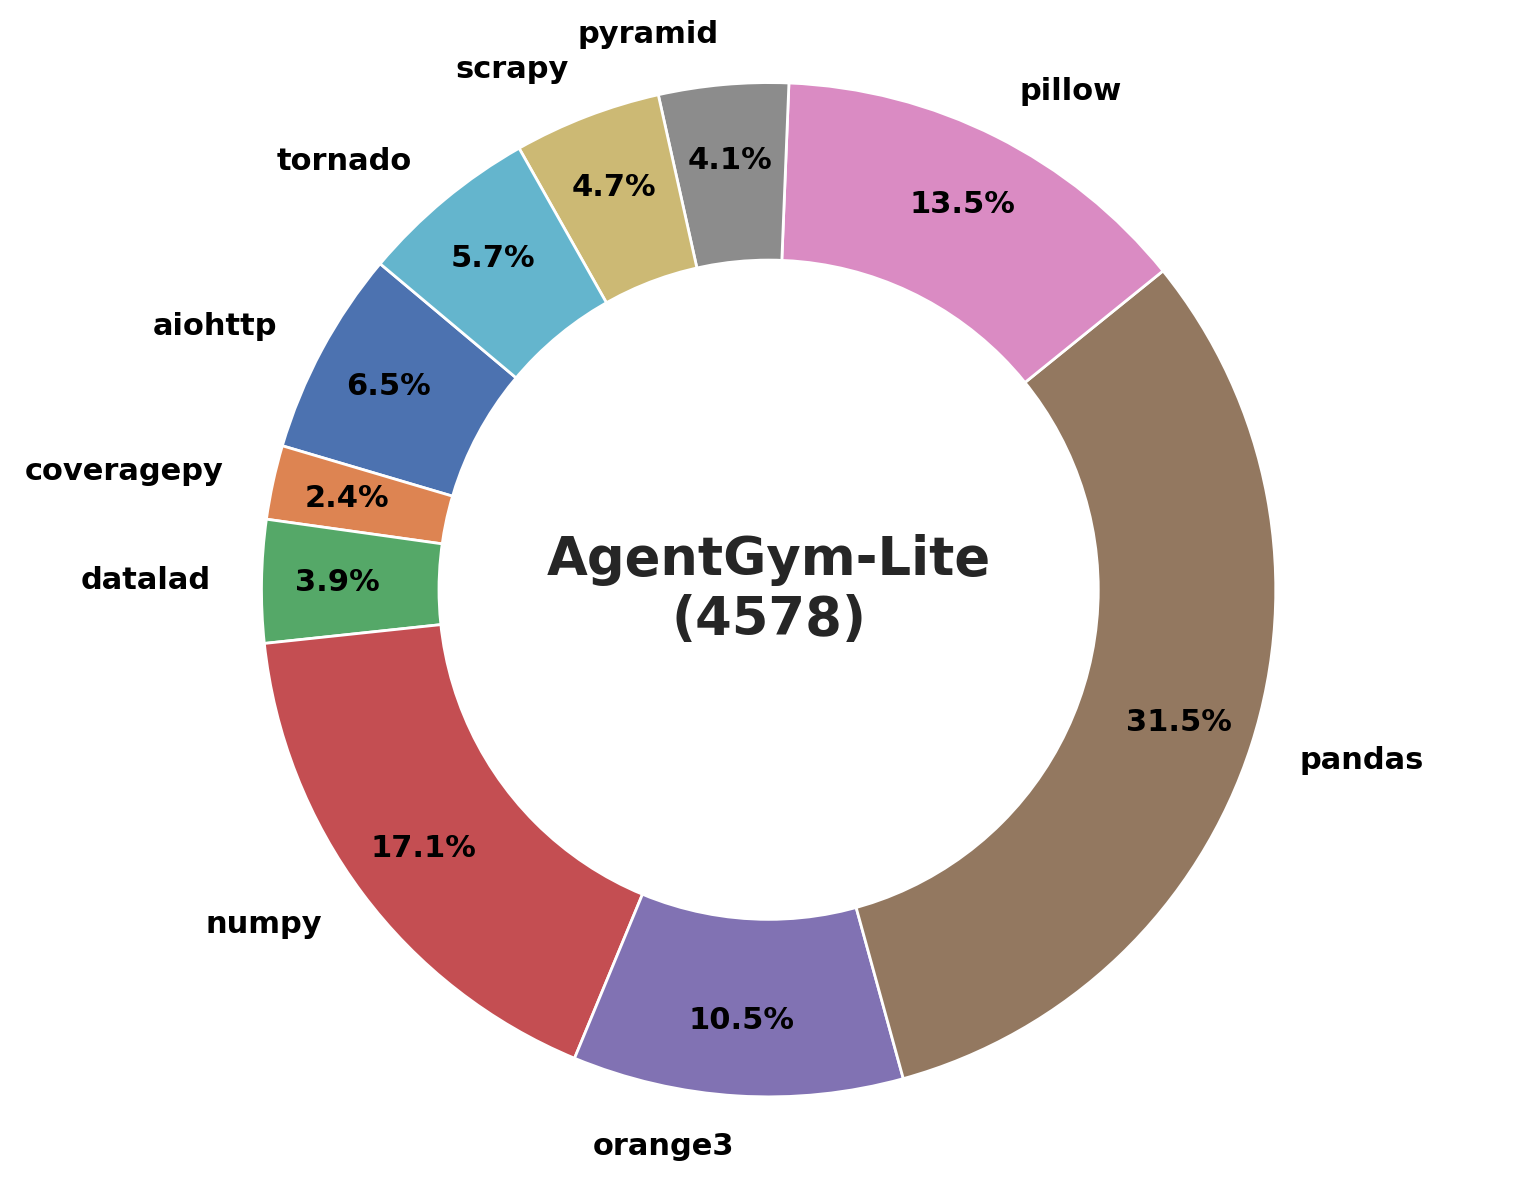

muted


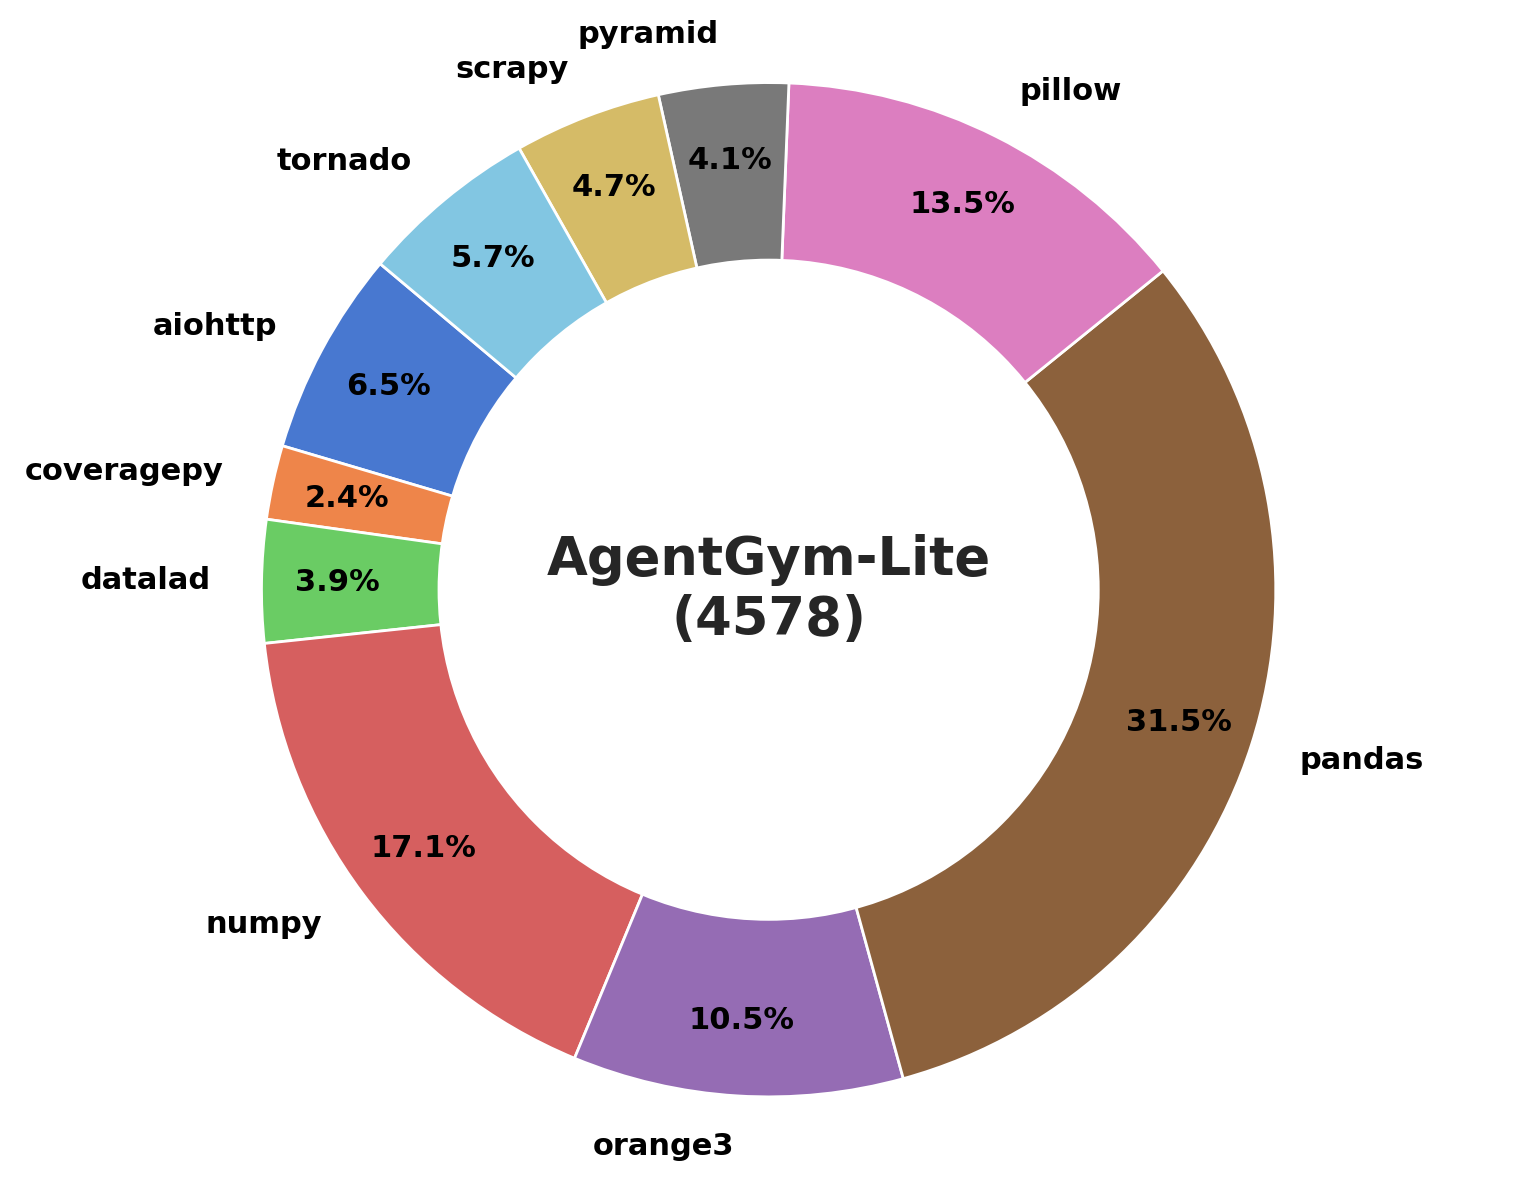

pastel


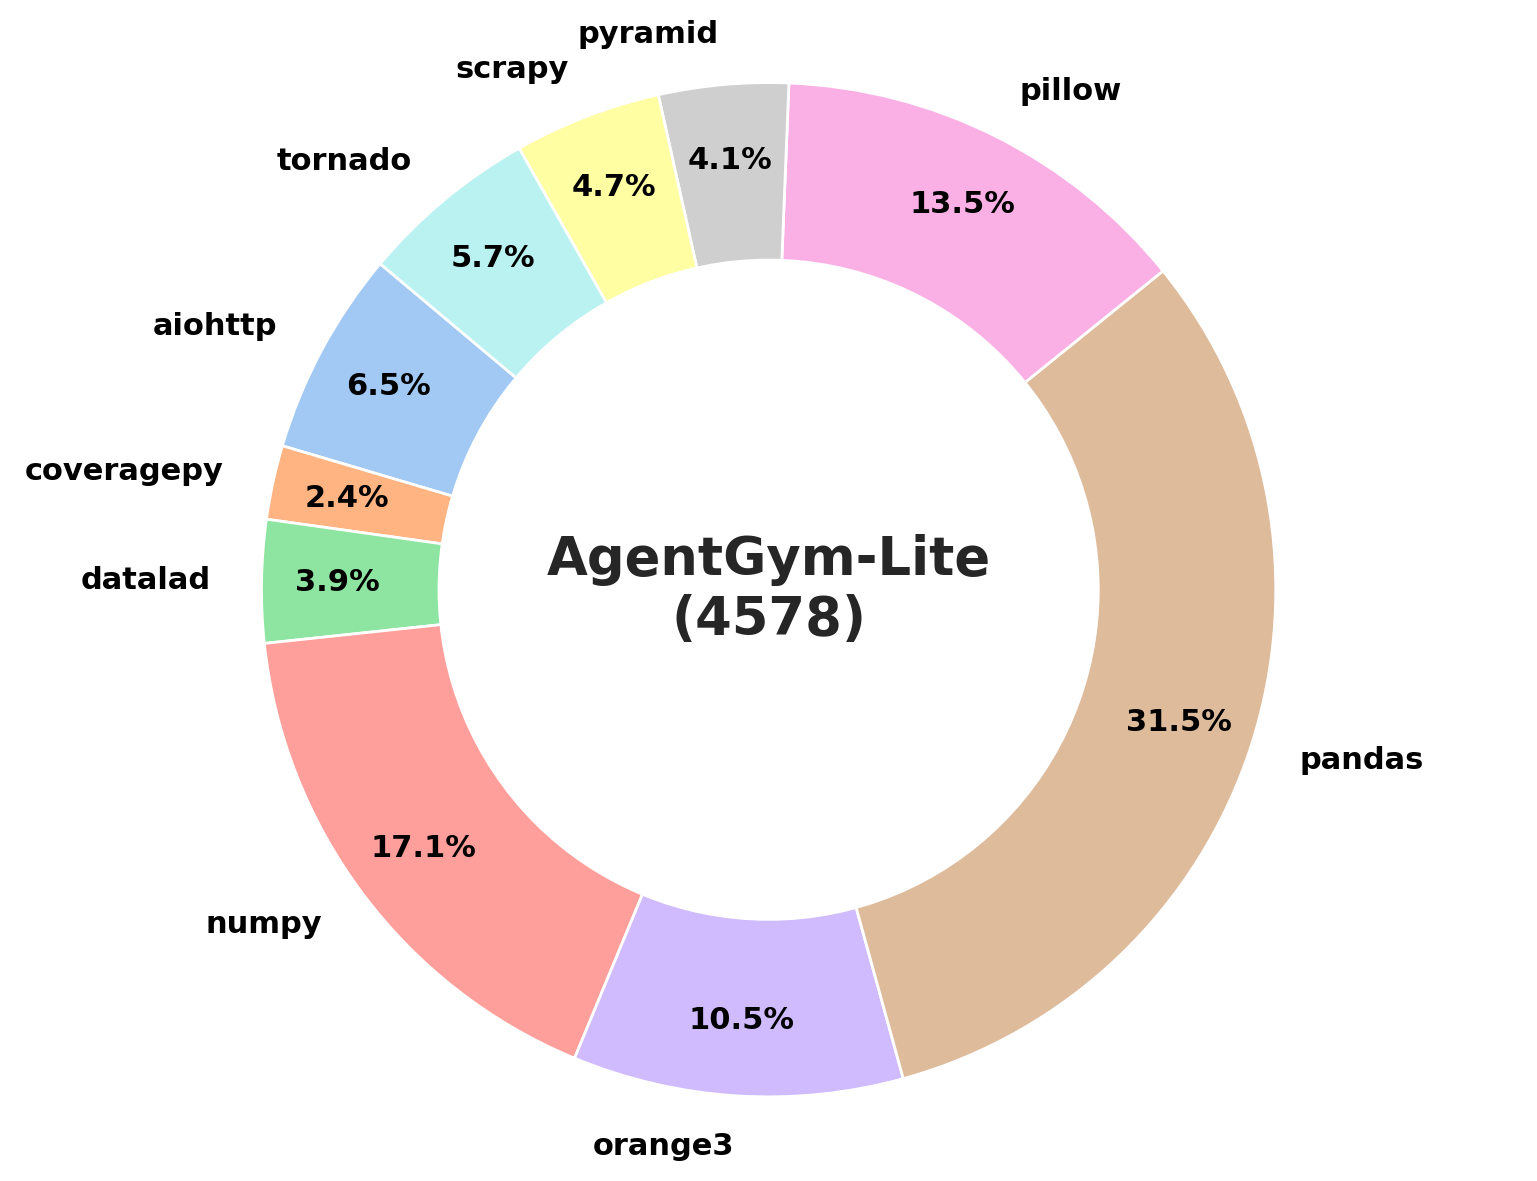

bright


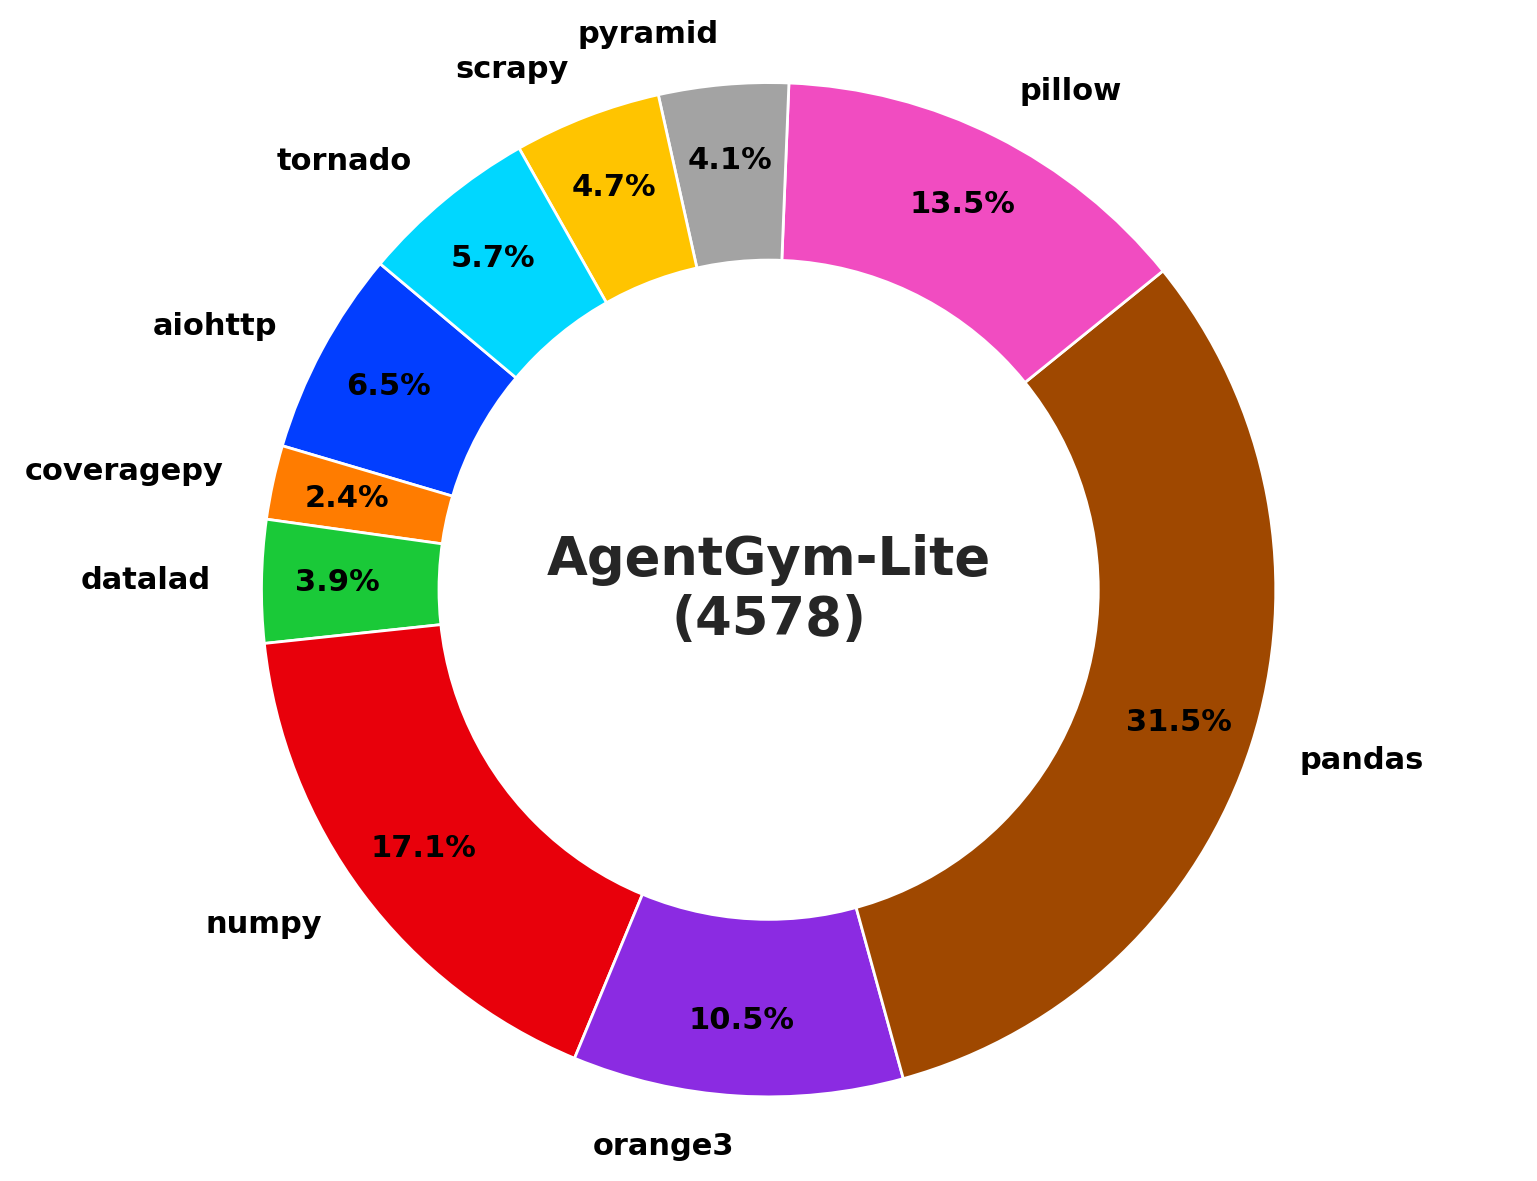

dark


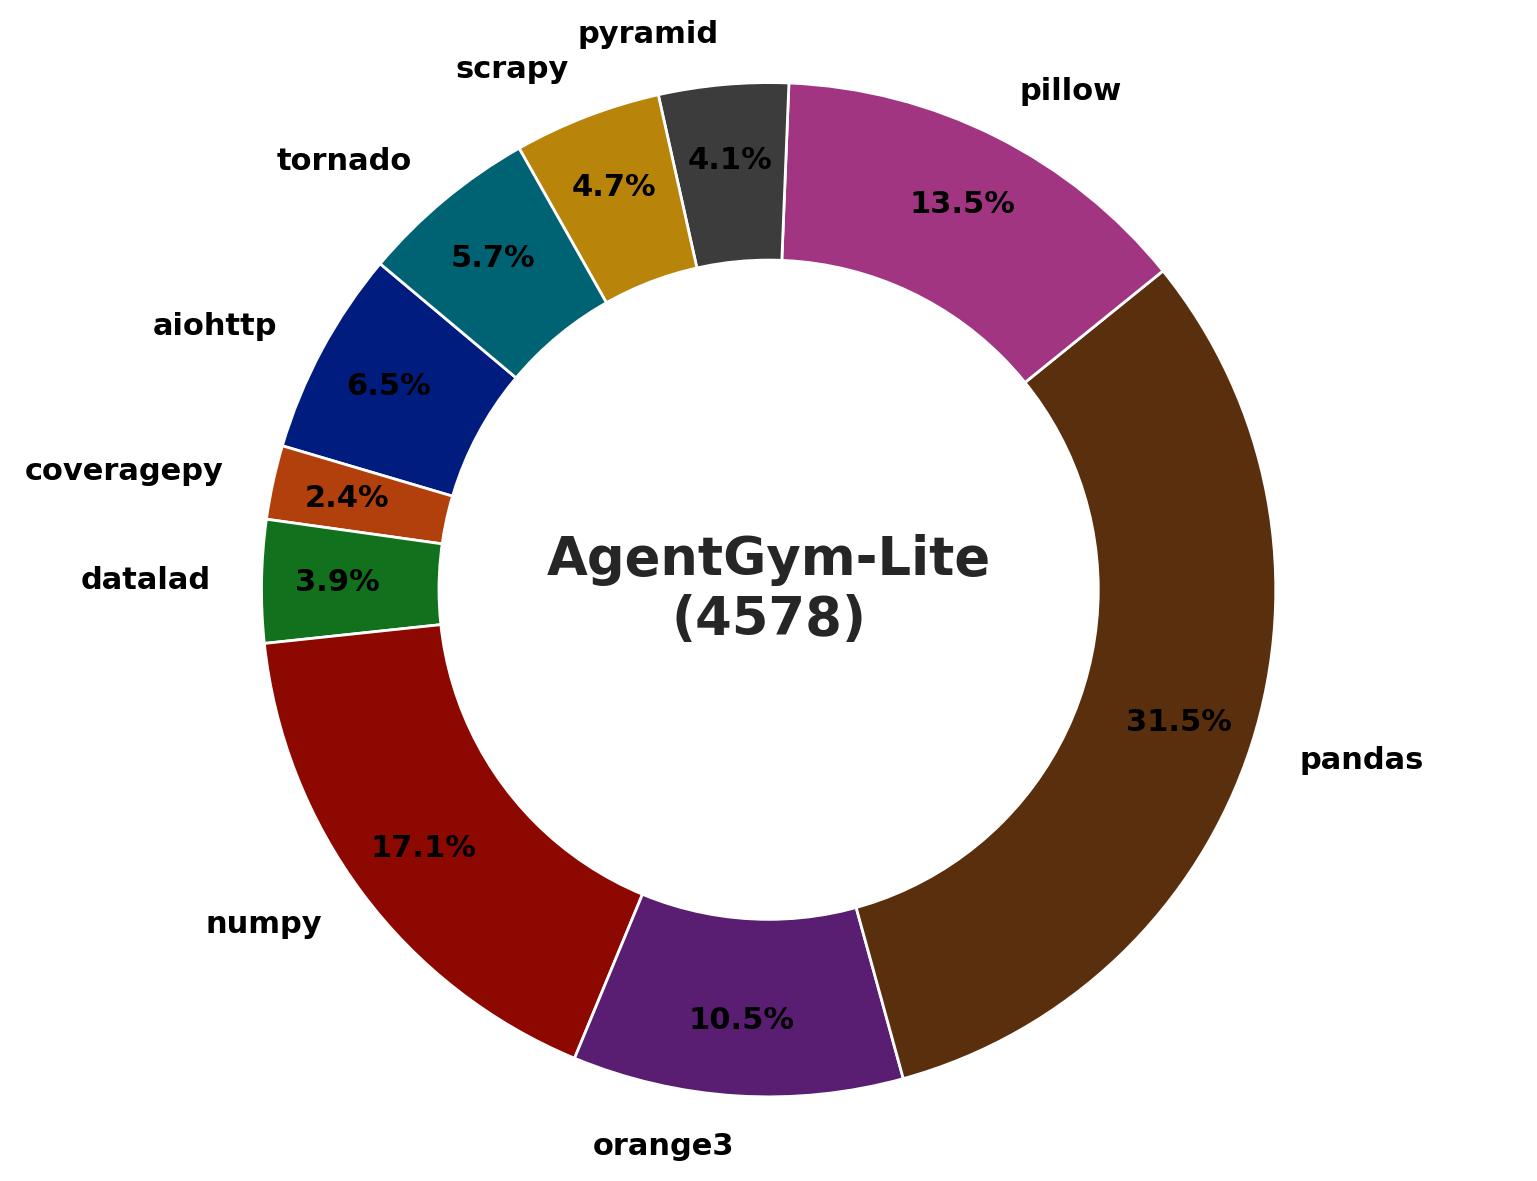

colorblind


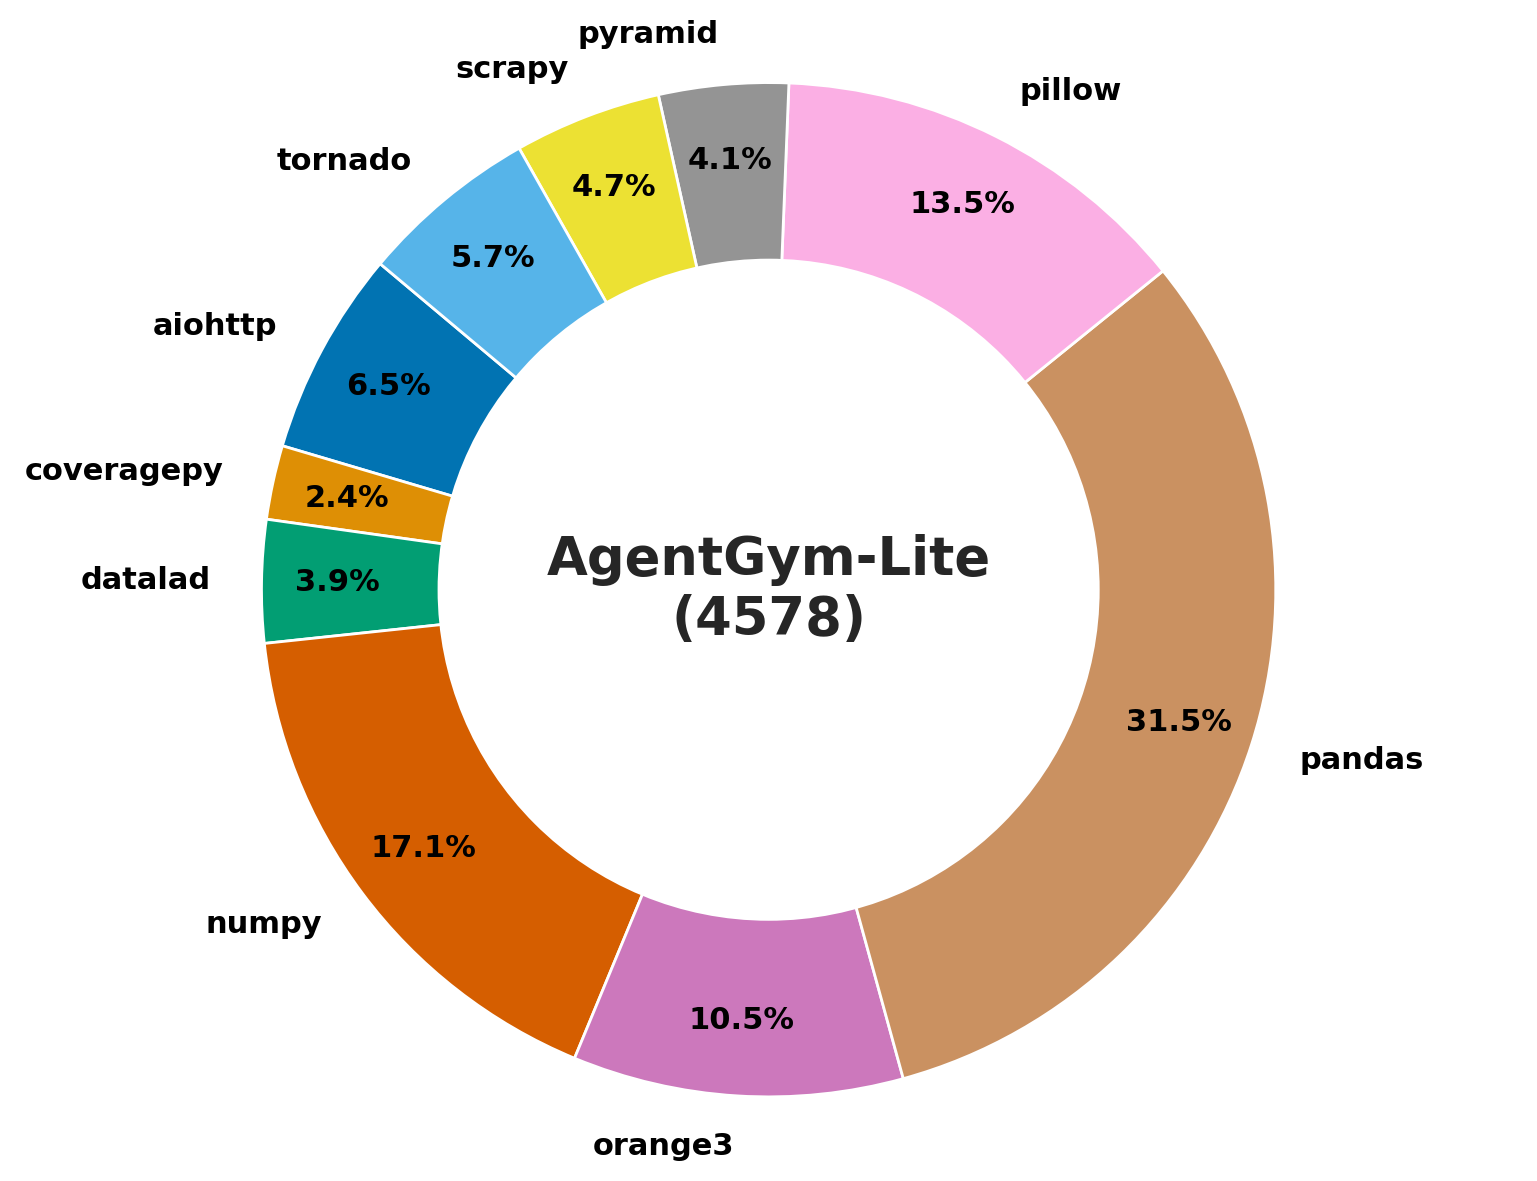

Set1


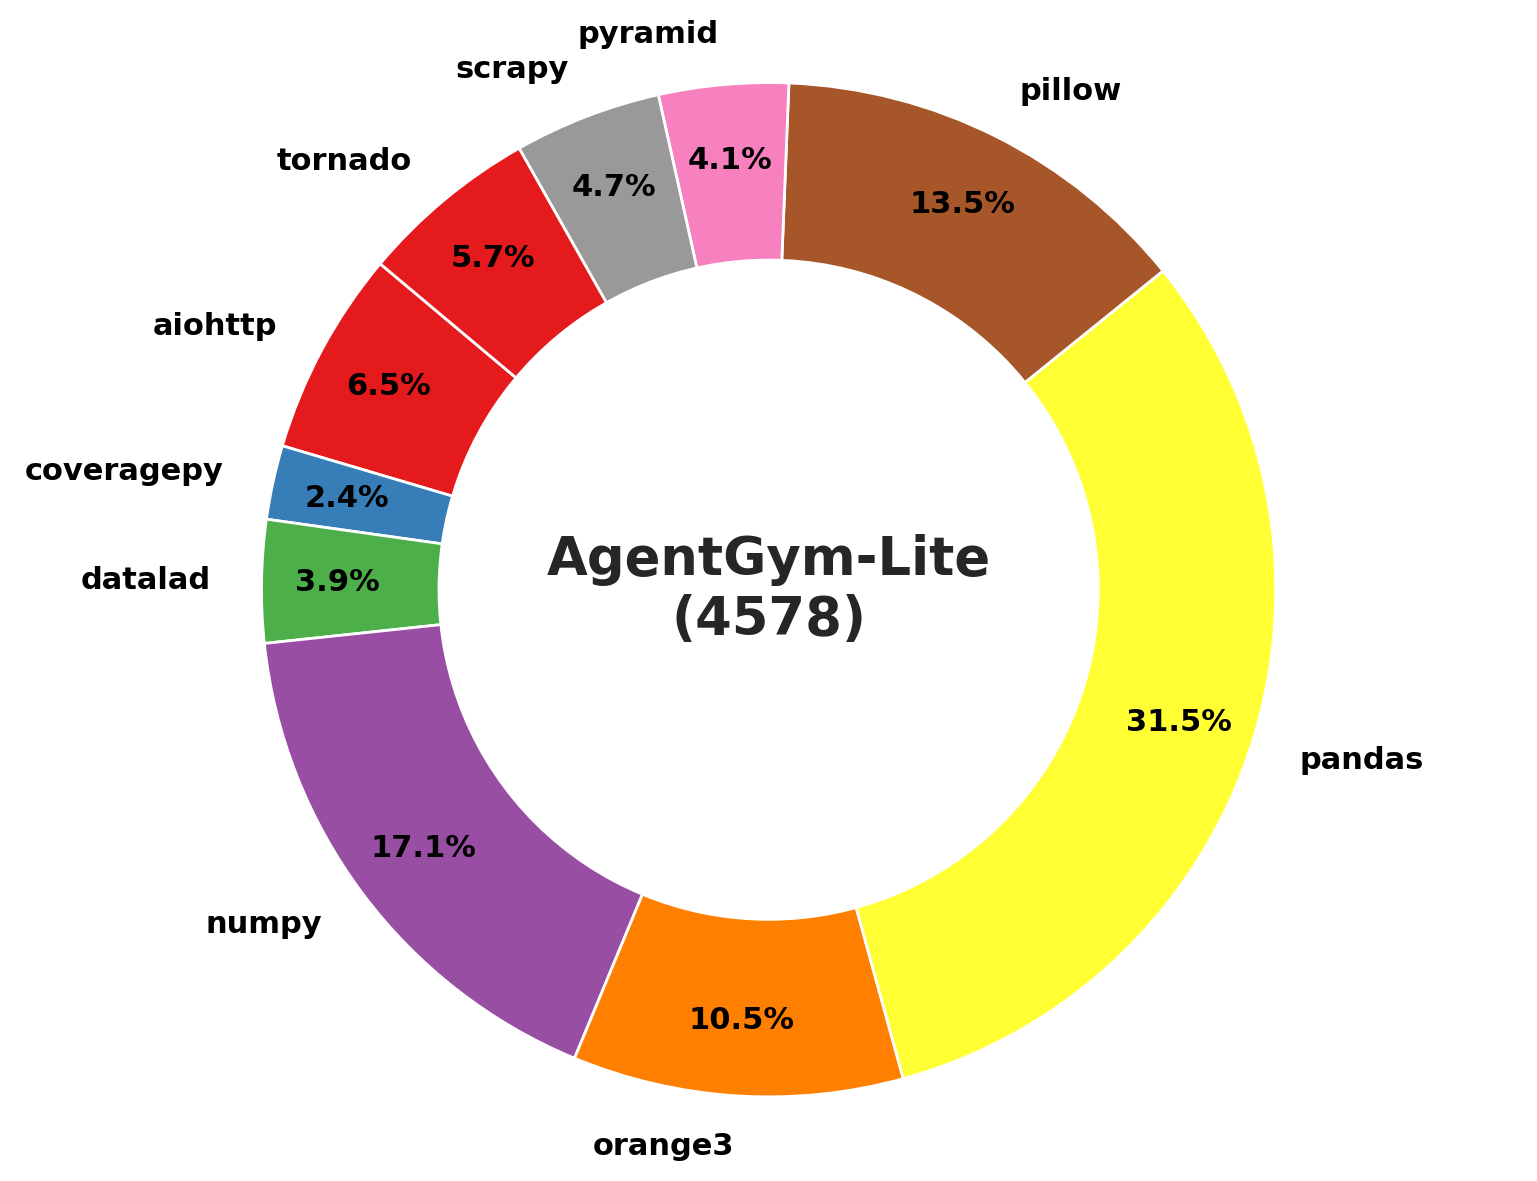

Set2


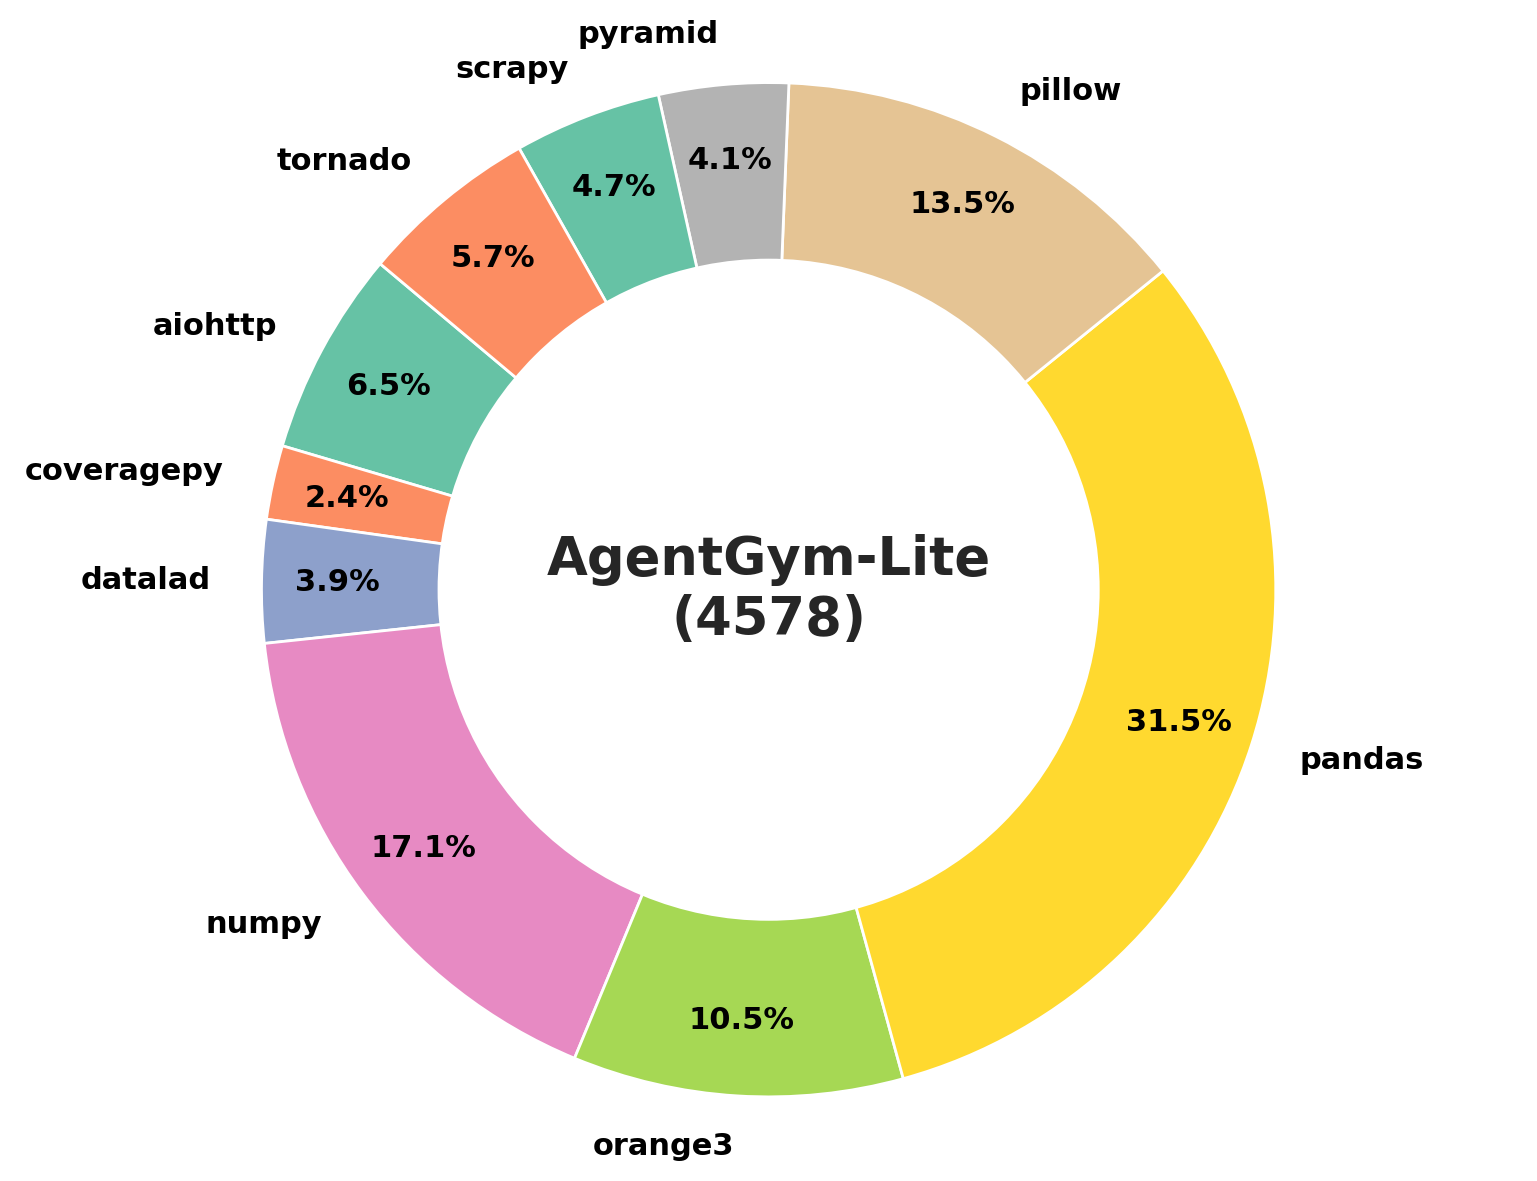

Set3


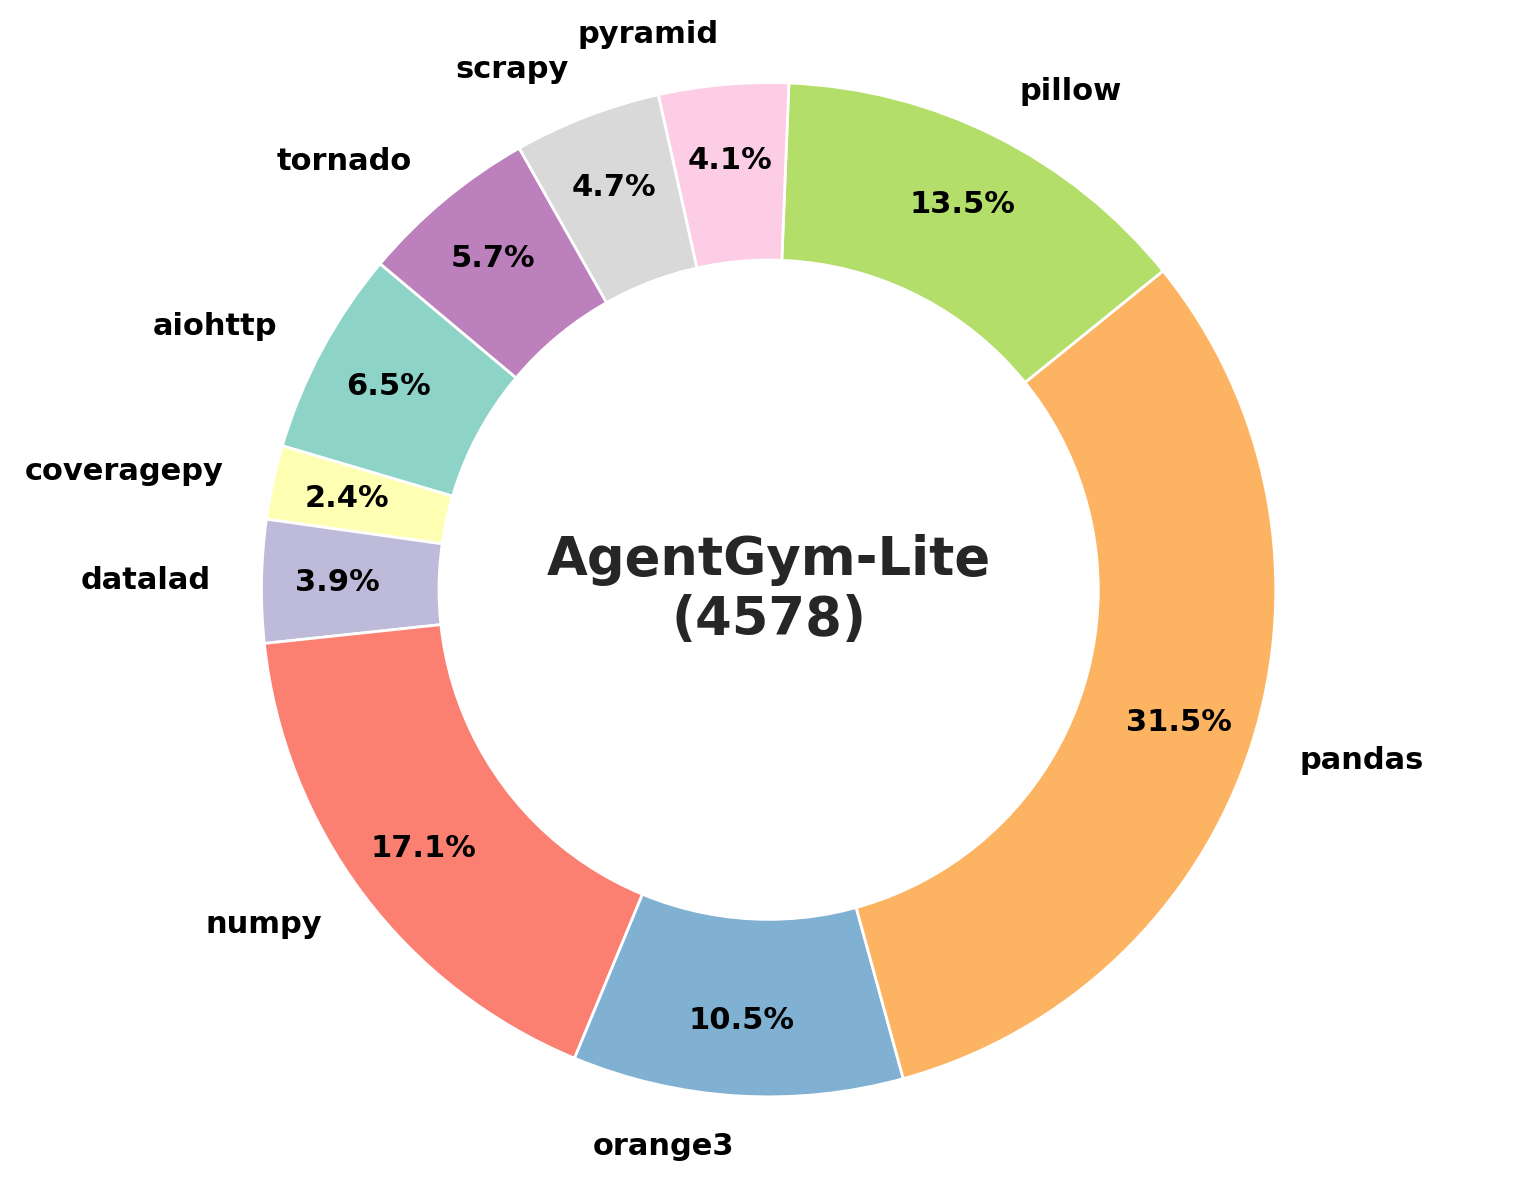

Paired


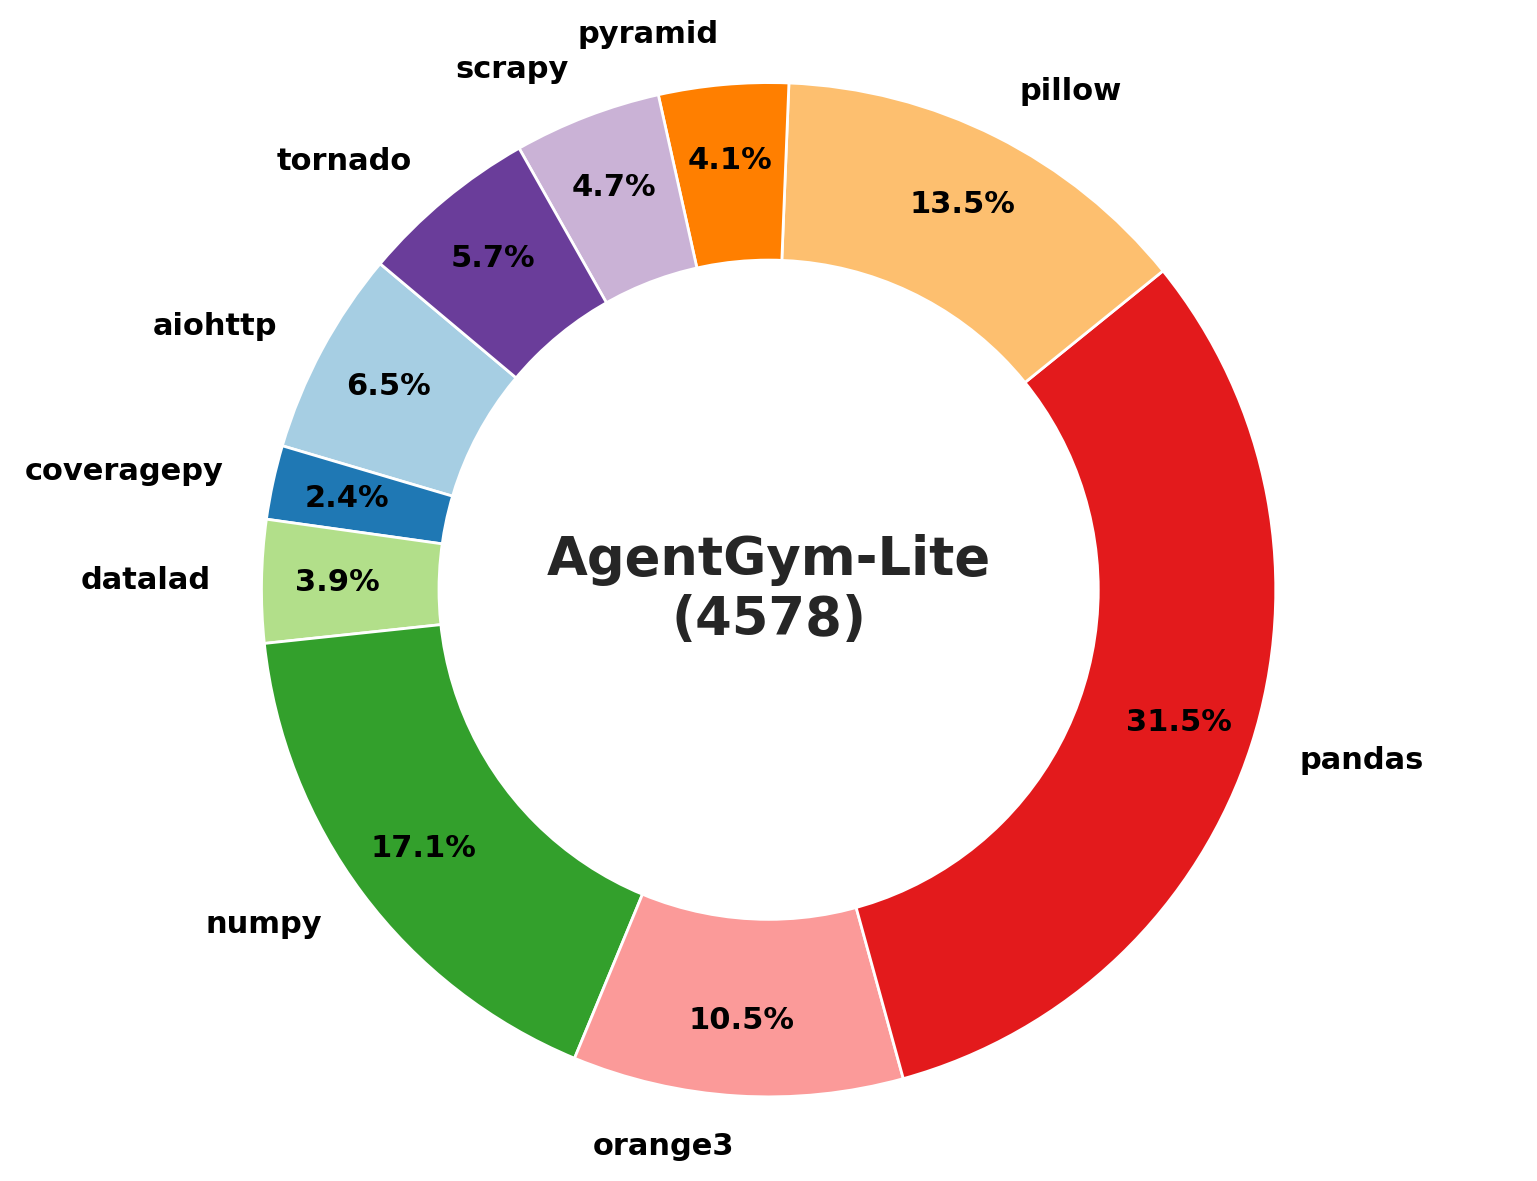

Accent


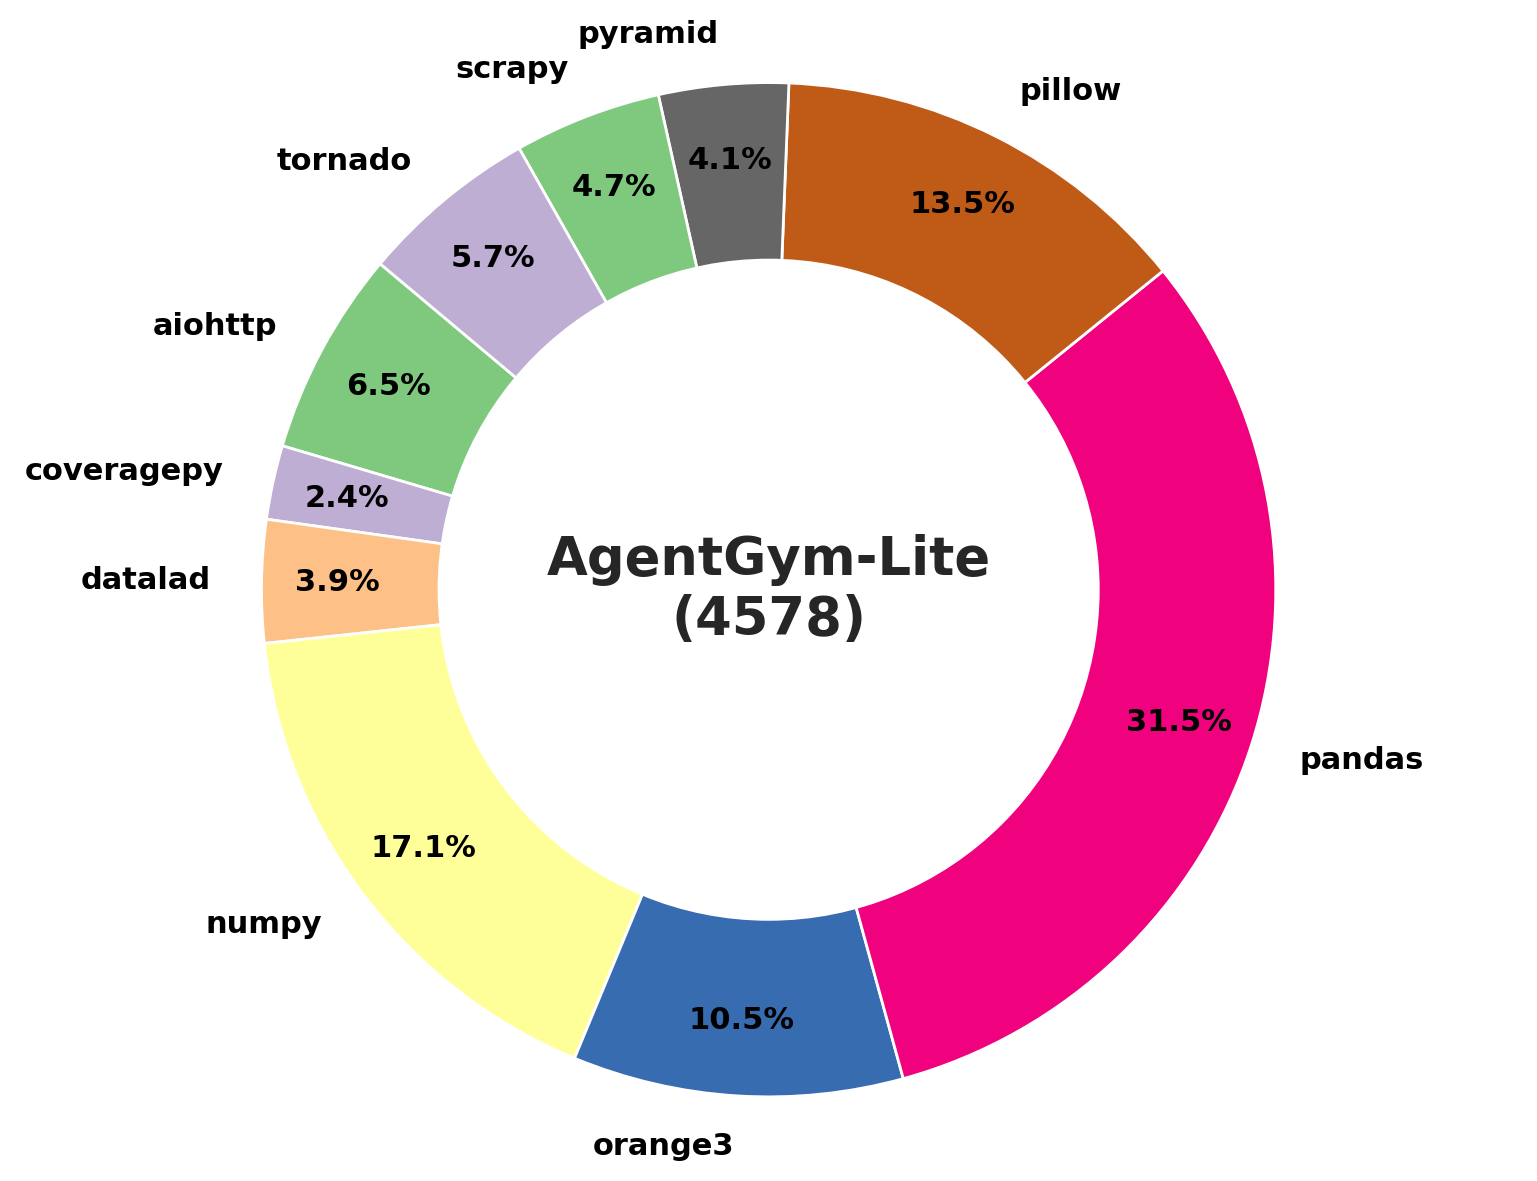

Dark2


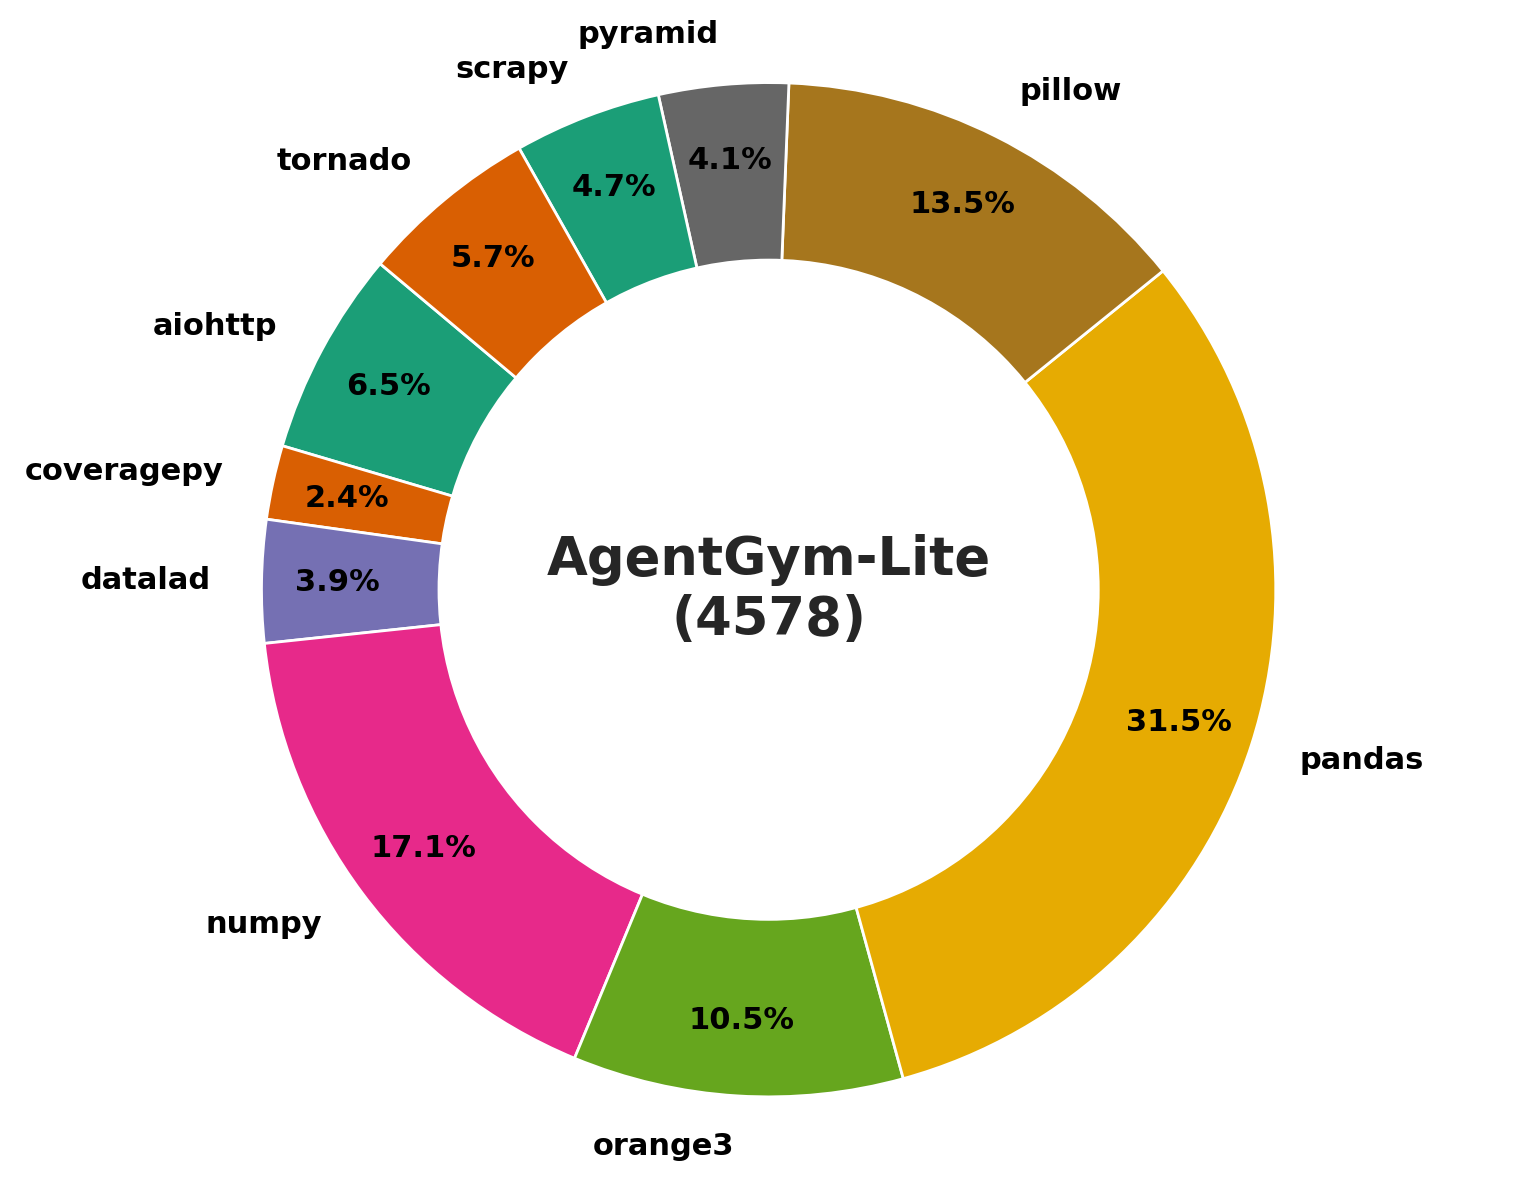

hls


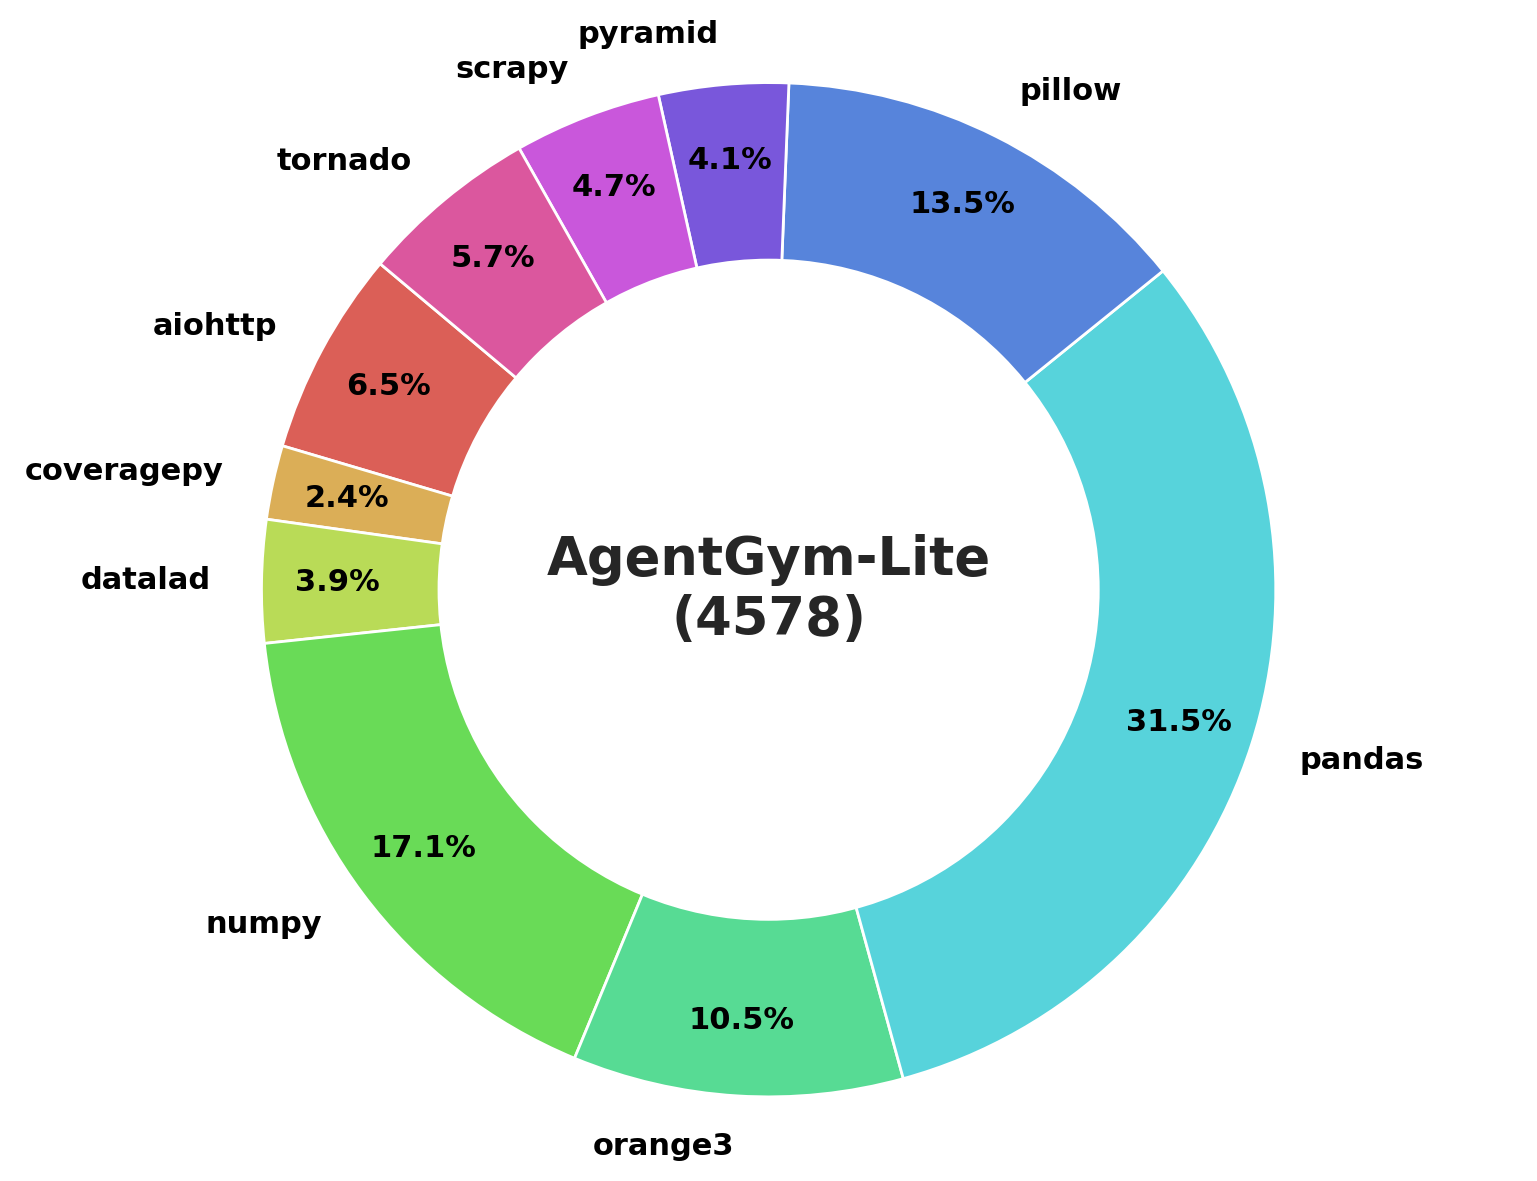

husl


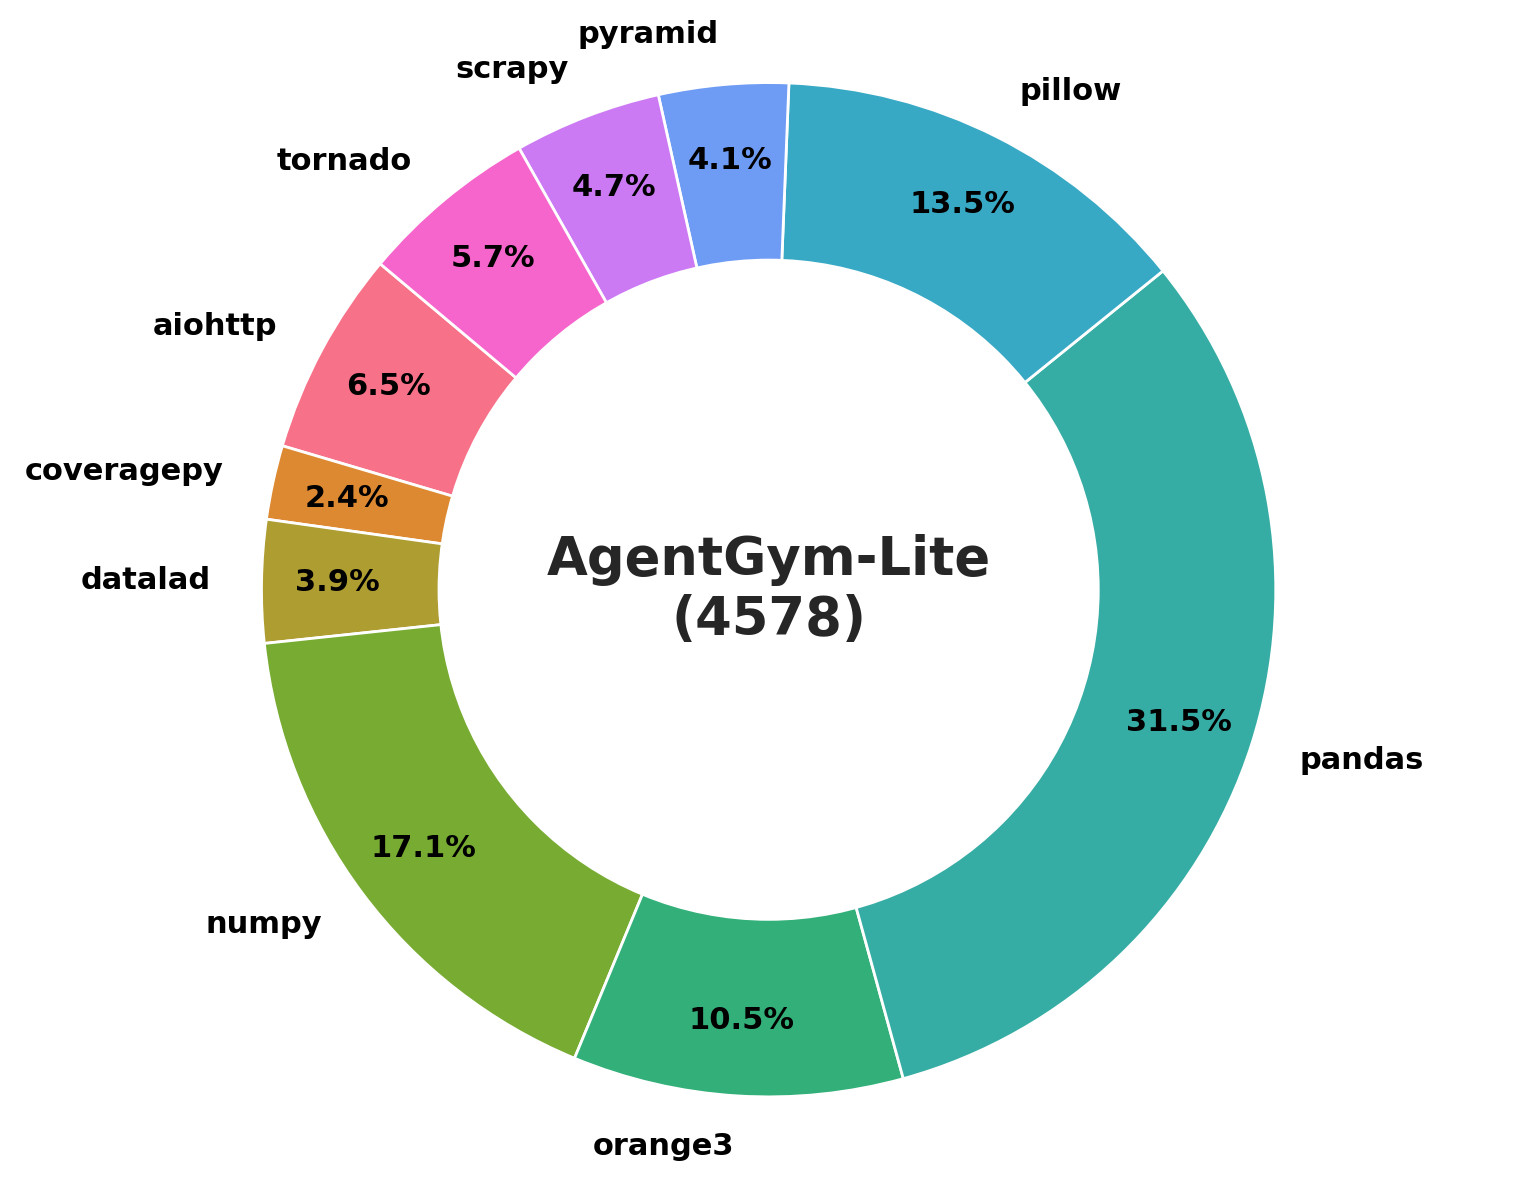

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# # Sample data (label -> value)
# data = {
#     "SWE-Gym": 2438,
#     "pandas": 737,
#     "bokeh": 26,
#     "hydra": 66,
#     "conan": 75,
#     "pydantic": 83,
#     "modin": 107,
#     "dask": 145,
#     "dvc": 225,
#     "mypy": 257,
#     "moto": 343,
#     "MONAI": 374
# }

data = data = Counter(ds['repo_name'])

# --- Convert dictionary to lists ---
labels = list(data.keys())
sizes  = list(data.values())

# --- Optional: sort by size if you want descending order (comment out if unwanted) ---
# sizes, labels = zip(*sorted(zip(sizes, labels), reverse=True))

# --- Seaborn styling ---
sns.set_theme(style="whitegrid")  # or "darkgrid", etc.

# List all available matplotlib styles
# Here's a curated list of discrete (qualitative) palettes + a few color brewer sets
palettes = [
    "deep", 
    "muted", 
    "pastel", 
    "bright", 
    "dark", 
    "colorblind",
    "Set1", 
    "Set2", 
    "Set3", 
    "Paired", 
    "Accent", 
    "Dark2", 
    "hls", 
    "husl"
]
print("Available styles:", palettes)

for palette in palettes:
    print (palette)
    # Use a nice qualitative palette; adjust n_colors as needed
    colors = sns.color_palette(palette, n_colors=len(data))
    
    # --- Create the figure ---
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # --- Draw a pie chart (we’ll turn it into a donut) ---
    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        autopct="%1.1f%%",      # format inside-slice labels
        startangle=140,         # rotate start
        colors=colors,
        pctdistance=0.85,       # label position (closer to center for donut)
        textprops=dict(color="black", weight="bold")
    )
    
    # --- Draw a white circle in the middle to make it a donut ---
    center_circle = plt.Circle((0, 0), 0.65, color="white")
    ax.add_artist(center_circle)
    
    # --- Style adjustments ---
    # Make sure pie is drawn as a circle (equal aspect ratio)
    ax.axis("equal")  
    
    # Optionally, change the size of inside labels
    for autotext in autotexts:
        autotext.set_size(11)  # You can adjust this
    
    # --- Title or annotation in the center (optional) ---
    # We can annotate the center with total count, for example:
    total = sum(sizes)
    ax.text(
        0, 0, f"AgentGym-Lite\n({total})", 
        horizontalalignment="center", 
        verticalalignment="center", 
        fontsize=19, weight="bold"
    )
    
    # --- Final layout and show ---
    plt.tight_layout()
    plt.show()

## 1.3 Verifier Attention Visualization

## TestGen Scaling Curve

- with tests
- with verifier
- with verifier + tests
- pass@k